# Week 3: Outlier Treatment and Change Detection


# Outlier Analysis

## Context

Exercpts and summaries from [text](http://charuaggarwal.net/outlierbook.pdf) by Charu Aggarwal.
- In this context, outliers are "observations which deviate so much from the other observations as to _arouse suspicions_ that it was generated by a different mechanism". Outliers could arise from either __true anamolies (<i>strong outliers</i>)__ (different data generating process), or __noises (<i>weak outliers</i>)__ which generated large deviations from inliers. The former is known as _strong_ outliers relative to the latter because outliers arising from true anamolies usually have much higher outlier score than noise.
- Outliers can be _collective_. E.g. a sequence of fradulent credit card behavior, or a structural break in a time series.
- Outlier detection algorithms (which are __unsupervised__ in nature) usually output an outlier score (continuous) or a label (binary) for decision making. The bulk of the outlier detection algorithms could be used for either noise reduction or detecting anamolies, since the difference between them is really one of semantics. It should be noted that effectiveness of outlier detection also largely depends on the choice of the _core model_. Poorly fitted points might appear as outliers under bad models / assumptions. An example is using the $Z$-score on finite data (which actually follows $t$-distribution), or even worse, the data is from a Zipf-distribution.

## Examples of Detection Algorithms

1. __Feature selection in outlier detection__. We would like to determine which features to be included in outlier detection.
    - A common way of measuring the non-uniformity of a set of univariate points is the Kurtosis score. Specifically, we generate $Z$-socres $z_i = \frac{x_i-\mu}{\sigma}$ and form the Kurtosis score as $K = \sum_i \frac{z_i^4}{N}$. Feature distributions that are very non-uniform show a high level of Kurtosis. For example, when the data contains a few extreme values, the Kurtosis measure will increase. Kurtosis measures are often used in the context of subspace outlier detection methods (see Chapter 5), in which outliers are explored in lowerdimensional projections of the data. The downside is that it does not consider interactions between features.
    - Another way is to analyze the residuals. Features that are uncorrelated with all other features should be considered irrelevant because outliers often correspond to violation of the model of normal data dependencies, so uncorrelated features cannot be used to model data dependencies. For example, if one uses a regression model to predict one of the features from the other features, and the average squared error is too large, then such a feature should be pruned. All features are standardized to unit variance and the root-mean squared error $RMSE_k$ of predicting the $k$-th feature from other features is computed. Note that if $RMSE_k$ is larger than 1, then the error of prediction is greater than the feature variance and therefore the $k$-th feature should be pruned.
    
    
2. __Extreme-Value Analysis__. Based on statistical tails of the underlying distribution. Can be extended to multivariate settings, where scores might become multivariate, as well. As most outlier modeling algorithms quantify the deviations of the data points from the normal patterns in the form of a numerical score, Extreme-value modeling plays an important role in most outlier detection algorithms as a final step. E.g. one can use extreme-value analysis to identify the unusually large deviations in OLS residuals. Other examples include [Grubbs test](https://en.wikipedia.org/wiki/Grubbs's_test), and the data science defined IQR$\pm$1.5 rule (IQR = 75-th percentile - 25-th percentile).



3. __Principal Component Analysis and Spectral Models__.  PCA can be derived through multivariate regression analysis by determining the hyperplane that minimizes the least-squares error (i.e., distance) to the hyperplane. In other words, it provides a subspace of lower dimensionality with the least reconstruction error after projection. Outliers have large reconstruction errors because they do not conform to the aggregate subspace patterns in the data. Therefore, the reconstruction errors may be used as outlier scores. In addition, principal component analysis can be used for noise correction, in which the attributes of data points are modified to reduce noise.  Spectral methods are also closely related to matrix factorization, which can also be used in such settings.



4. __Proximity-Based Models__.  Proximity-based methods may be applied in one of three ways, which are clustering methods, density-based methods, and nearest-neighbor methods.
    - Clustering (e.g. K-Means) and density-based methods (e.g. DBScan): the dense regions in the data are found directly, and outliers are defined as those points that do not lie in these dense regions. Alternatively, one might define outliers as points that are located far away from the dense regions. The main difference between clustering and density-based methods is that clustering methods segment the data points, whereas the density-based methods such as histograms segment the data space. An example of outliers identified by the latter is "$Age < 20, Salary > \$200,000$" in census data. 
    - In nearest-neighbor methods, the distance of each data point to its kth nearest neighbor is reported as its outlier score. By selecting a value of k > 1, small groups of tightlyknit points that are far away from the remaining data set can be identified and scored as outliers. It is reasonable to treat such sets of data points as outliers, because small related sets of points can often be generated by an anomalous process. For example, this approach can identify a small set of isolated but closely spaced and related anomalies from a large cluster of inliers.



5. __High-Dimensional Outlier Detection__. Some caveats of applying outlier detection on high-dimensional settings.
    - The high-dimensional case is particularly challenging for outlier detection. The reason for this behavior is that many dimensions may be noisy and irrelevant for anomaly detection, which might also increase the propensity for pairwise distances to become more similar. This causes irrelevant attributes to have a dilution effect on the accuracy of distance computations and therefore the resulting outlier scores might also be inaccurate (in high-dimensional space, the data becomes increasingly sparse, and all pairs of data points become almost equidistant from one another. As a result, the outlier scores become less distinguishable from one another).
    - In such cases, outliers are best emphasized in a lower-dimensional local subspace of relevant attributes. This approach is referred to as subspace outlier detection, which is an important class of algorithms in the field of outlier analysis. The assumption in subspace outlier detection is that outliers are often hidden in the unusual local behavior of low-dimensional subspaces, and this deviant behavior is masked by full-dimensional analysis. Therefore, it may often be fruitful to explicitly search for the subspaces in which the anomalous behavior of points is best emphasized.
    -  It may often be fruitful to explicitly search for the subspaces in which the anomalous behavior of points is best emphasized. This is related to [_outlier ensemble_](http://www.charuaggarwal.net/ensembles.pdf).
    

6. __Isolation Forest__. Check [this post](https://towardsdatascience.com/a-brief-overview-of-outlier-detection-techniques-1e0b2c19e561) by Sergio Santoyo. He also included a summary of the points above and empirical implementation codes.

# CUSUM - Detecting Changes in Data

## Context
- We will be studying a few control chart models in the [statistical process control](https://en.wikipedia.org/wiki/Statistical_process_control) literature. Statistical process control is a class of methods to ensure variable in a (manufacturing or business) process is in a state of control. Control charts are methods to provide a graphical representation to facilitate process control decisions. 
- A subgroup in this context, is a group of units that are created under the same set of conditions - hence same distribution. It is typical to think that items in a subgroup arises from a batch of outputs in a production line, so subgroups (or rational subgroups) represent "snapshots" of the production process. See [here](https://support.minitab.com/en-us/minitab/18/help-and-how-to/quality-and-process-improvement/control-charts/supporting-topics/data/working-with-subgroups-in-variables-control-charts/) for more precise defintions.
- CUSUM and EWMA (as well as MA) models work with __time series__ where the size of each rational subgroup is 1. This relaxes the independence assumption across samples and allows us to extend the usage outside manufacturing quality control. Examples include stock close price series (as in [this post](https://towardsdatascience.com/applying-two-ideas-from-advances-in-financial-machine-learning-433c7950858a)), seismic series that keep track of earthquake-related seismic movements, another example would be to look at the reaction time for an individual over a series of tests, to see if it improved (adaptation) or worsen (fatigue).
- The unit subgroup assumption is also the most general assumption - recall that observations within each subgroup are assumed to arise from the same set of conditions. 
- One of the motivation for CUSUM is that traditional hypothesis testing is inefficient for small subgroups. For example, to detect anaomly in seismic movement, statistical significant requires values above 1-2 s.d.'s (depending on underlying distribution) - by which time detection will be too late. This is exacerbated by the fact that each subgroup only has one observation. 

# CUSUM Model for Change Detection

## Overview

Suppose we have a unit subgroup process $\{x_n\}$ arising from a system. Define the CUSUM statistic recursively as: $S_n = \max\{ S_{n-1} + x_n, 0\}$ with boundary conditions $S_0 = 0$. Intuitively, $S_n$ captures cumulative positive impact relative to the historical values of $x$. The event that a CUSUM statistic exceeds a threshold is hoped to capture a latent increase in the __underlying data generating process__, for example, increases in the mean parameter $\theta$ where the sample is known to be generated from a normal $N(\theta, \sigma^2)$. In short, the CUSUM statistic measures the cumulative deviations with respect to a known baseline over time. The _negative_ version of CUSUM (targeting latent changes that create value drops) is: $S_n^- = \max\{  S^-_{n-1} - x_n , 0\}$. We usually evaluate the statstic on both sides track changes in both directions. 

<img src="https://www.jmp.com/support/help/en/15.2/jmp/images/CUSUMcc_splash.png">

#### Pros and Cons

The CUSUM chart is known to be very effective for small shifts and when the subgroup size equals one. On the other hand, it is noted that it is relatively slow to respond to large shifts. Also, special patterns are hard to see and analyze. It is best used where __1. process in control shows little deivations__, and __2. the out of control process is known to show significant deviations__. 

#### Hyperparameter Tuning

The main hyperparameter to tune and control would be $L$, the threshold beyond which action should be taken when the CUSUM statistic exceeded, and also a tolerance $T$ to prevent the model from being too sensitive. Formally, $S_n = [S_{n-1} + x_n - \mu - T]^+$ for a one-sided CUSUM chart. i.e. the threshold of _accounting cumulative effects_ is jointly determined by $\mu$ and $T$. 
- $\mu$ is the parameter value for the process in control.
- $T$ is tolerance - we would still want to allow $x$ to have some sampling variance around $\mu$. If $T$ is too small, then the model is too sensitive, but when if it is too large it can lead to delayed decisions.
- $L$ defines the decision rule for _taking action_: take actions if $S_n \geq L$.

In two-sided implementation, we have thresholds $\nu^{\pm} = \mu \pm \frac{T}{2}$ and resulting statistics $S^{\pm}_n = \big[S^{\pm}_{n-1} \pm (x_n-\nu^\pm)\big]^+$

Here's some comments about $T$ from [Basseville](https://www.fs.isy.liu.se/Edu/Courses/TSFS06/PDFs/Basseville.pdf): In most practical cases, little is known about what parameter would represent an out-of-control process ($f_1$ in next section). However, three possible __<i>a priori</i>__ choices based on ad hoc knowledge of the data generating process can be made for using the CUSUM algorithm in this case. 
1. The first consists of choosing $T$ as a minimum possible magnitude of jump. 
2. In the second, we choose a priori the most likely magnitude of jump. 
3. The third choice for $T$ is a kind of worst-case value from the point of view of the cost of a nondetected change. 

In these three cases, the resulting change detection algorithm is optimal for only one possible jump magnitude equal to $T$. 

Also check [this paper](https://hal.inria.fr/hal-02389331v2/document) out for some proposed CUSUM threshold selection schemes. [This blogpost](https://community.jmp.com/t5/JMPer-Cable/Using-ARL-Average-Run-Length-to-determine-the-performance-of-a/ba-p/61895) discusses using __average run lengths (ARL)__ to tune $T$ and $L$ jointly.

It is noted that that an __<i>a posteriori</i>__ choice of the most likely magnitude leads to the GLR algorithm leads to the almost optimal algorithm in such a case. Check the linked text above for details.

#### Examples

- In [this example](https://www.integral-concepts.com/wp-content/media/What-is-a-CUSUM-Chart-and-When-Should-I-Use-One.pdf) $T$ is chosen to be $\sigma$ to detect changes in a series known to be sampled from Normal (known $\sigma^2$).
- [Chu, Stinchcombe, and White (1996)](https://rmgsc.cr.usgs.gov/outgoing/threshold_articles/Chuetal1996.pdf) derived a CUSUM test to detect structural breaks for linear time series models. For example if it is known that $Y_t = X_t \beta_t + \varepsilon_t$ with a know period of stationarity $H_0: \beta_t = \beta_0$ for $t \leq m$ the authors proposed a CUSUM statistic as a function OLS estimates and residuals to test the alternative against $H_0$ for $t > m$. Empirical implementation can be found [here](https://towardsdatascience.com/applying-two-ideas-from-advances-in-financial-machine-learning-433c7950858a).

## Motivation and Interpretation

Check [this book](https://www.fs.isy.liu.se/Edu/Courses/TSFS06/PDFs/Basseville.pdf) out. In order to understand the motivation for the CUSUM statistic from an MLE perspective, we first prove the following proposition.

### Proposition: 

Let $\{x_k\}$ be a series and define the partial sum as $S_n = \sum_{k=1}^n x_k$ with $S_0 = 0$. Define a series $S'_n$ as:

\begin{align*}
S'_n = 
    \begin{cases}
    \max\{S'_{n-1} + x_n, 0\} & \text{if } n > 0\\
    0 & \text{if } n = 0\\
    \end{cases}
\end{align*}

Then we have, $\forall n \in \mathbb{N}, L > 0$:

\begin{align*}
S_n - \min_{0 \leq i < n} S_i \geq L \iff S_n' \geq L 
\end{align*}

### Proof:

We show this by Mathematical Induction, in which we denote the statement specific for each $n$ as $P(n)$. The case for $n=1$ is trivial. Now suppose $P(n)$ holds, i.e. it is true that for a particular $n$ we have $S_n - \min_{0 \leq i < n} S_i \geq L \iff S_n' \geq L$ for any $L > 0$. 

#### "$\Rightarrow$"

We prove the "only if" part for $n+1$. Suppose:

\begin{align*}
S_{n+1} - \min_{0 \leq i < n+1} S_i & \geq L \\
x_{n+1} + S_n - \min_{0 \leq i < n+1} S_i & \geq L\\
\end{align*}

Now consider the following exhausive cases. 

1. If $S_{n} \geq S_i$ for some $1 \leq i < n$, then $\min_{0 \leq i < n+1} S_i = \min_{0 \leq i < n} S_i$. Hence,

\begin{align*}
& x_{n+1} + S_n - \min_{0 \leq i < n+1} S_i \geq L\\
\Rightarrow & x_{n+1} + S_n - \min_{0 \leq i < n} S_i \geq L\\
\Rightarrow & S_n - \min_{0 \leq i < n} S_i \geq L - x_{n+1}\\
\Rightarrow & S_n' \geq L - x_{n+1}   \\
\Rightarrow & S_{n+1}' \geq S_n' + x_{n+1} \geq L \\
\end{align*}

The fourth step is elaborated:

\begin{align*}
& S_{n} \geq S_i \text{ for some $1 \leq i < n$}\\
\Rightarrow & S_{n} - \min_{0 \leq i < n} S_i \geq 0\\
\text{Because $S_n - \min_{0 \leq i < n} S_i \geq L - x_{n+1}$:} \Rightarrow & S_{n} - \min_{0 \leq i < n} S_i \geq \varepsilon \text{ for some $\varepsilon \geq \max\{L-x_{n+1}, 0\}$} \\
\text{By $P(n)$ and $\varepsilon \geq 0$:} \Rightarrow & S_n' \geq \varepsilon \geq L - x_{n+1}
\end{align*}

2. If $S_{n} < S_i$  $\forall 1 \leq i < n$, then $\min_{0 \leq i < n+1} S_i = S_{n}$. Hence,

\begin{align*}
& x_{n+1} + S_n - S_n \geq L\\
 \text{ Because  $S_n' \geq 0$:} \Rightarrow & S_{n+1}' \geq x_{n+1} + S_n' \geq x_{n+1} \geq L
\end{align*}

#### "$\Leftarrow$"

We prove the "if" part for $n+1$. Suppose:

\begin{align*}
& S_{n+1}' \geq L \\
\text{ Because $L > 0$, $S_{n+1}' > 0$: }\Rightarrow & S_n' + x_{n+1} \geq L   \\
\Rightarrow & S_n' \geq L - x_{n+1} \\
\text{ By $P(n)$ and $S_n' \geq 0$: } \Rightarrow & S_n - \min_{0 \leq i < n} S_i \geq L - x_{n+1}\\
\Rightarrow & S_n + x_{n+1} - \min_{0 \leq i < n+1} S_i \geq S_{n+1} - \min_{0 \leq i < n} S_i \geq L
\end{align*}

### Intuition

__1. Reference period:__ By the fact that CUSUM threshold is equivalent to the reference period comparision, take action if $S_n - \min_{0 \leq i < n} S_i \geq L$. The CUSUM actually had an underlying assumption that the process starts out in control. therefore a good estimate for the parameter value when the process is under control, would be the best beginning $i$ periods.

__2. A general framework for statistical process control:__ Suppose the distribution for $x$ when it is under control is given by $f_0(x)$, and we suspect that the distribution is $f_1(x)$ when the process is out of control. The __log-likelihood ratio__ at each sample point, $\log\big(\frac{f_1(x)}{f_0(x)}\big)$. Taking $y_n$ as $\log\big(\frac{f_1(x_n)}{f_0(x_n)}\big)$, the CUSUM statistic can be interpreted as a metric measuring the cumulative positive effect on log-likelihood ratio:

\begin{align*}
S_{n+1} = \max\bigg\{S_n + \log\bigg(\frac{f_1(x_n)}{f_0(x_n)}\bigg), 0\bigg\}
\end{align*}

This is the sequential probability ratio test (SPRT) interpretation of CUSUM, resulting in the V-Mask CUSUM chart, which is covered in the [UCB class notes](https://inst.eecs.berkeley.edu/~ee290h/fa05/Lectures/PDF/lecture%2014%20CUSUM%20and%20EWMA.pdf).


# A General Framework for Change Detection Algorithms

Following from the second bullet point, change detection algorithms can be interpreted from a log-likelihood ratio perspective. Define the notations log-likelihood ratio $s$, its partial sum $S$, the change detection algorithm $d$ defined by criterion $g_k$, and threshold $h$ as follow:

\begin{align*}
s_i &= \log\bigg(\frac{f_1(x_i)}{f_0(x_i)}\bigg)\\
S_j^k &= \sum_{i=j}^k s_i \\
d &= \begin{cases}
    0 & \text{ if } g_k < h \\
    1 & \text{ if } g_k \geq h
\end{cases}
\end{align*}

Usually, $g_k = g(S_1^k)$, or more generally, $g_k = g(s_1, s_2, \ldots, s_k)$. Also, where subgroup sizes are larger than 1, $x_i = \bar{x}_i$, the sample mean for the $i$-th subgroup.

## Examples

1. __CUSUM__. We see that under this notation, $g_k$ is recursively defined as $g_k = [g_{k-1} + x_k]^+$, with boundary condition $g_0 = 0$.


2. __Geometric Moving Average / Exponentially Weighted Moving Average (EWMA)__. It might be of interest to use higher weights on recent observations and lower weights on past ones, in which case we can exponentially forget past samples. In terms of the notations above,

\begin{align*}
\gamma_i &= \alpha(1-\alpha)^i, \alpha \in (0,1]\\
g_k &= \sum_{i=0}^\infty \gamma_i s_{k-i} = (1-\alpha) g_{k-1} + \alpha s_k
\end{align*}

EWMA charts are also used in [analyzing returns of a financial instrument](https://www.investopedia.com/articles/07/ewma.asp). According to [this blogpost](https://blog.pqsystems.com/2017/06/13/perennial-question-chart-best/) by PQ Systems, some advantages are, that EWMA charts offer a quicker signal to detecting small changes, and they are good at comparing data to target values, to understand when a process has drifted off target. A subtle disadvantage of the EWMA is that it requires an additional parameter to be tuned, $\alpha$ which involves knowledge of the data generating process.

3. __Finite Moving Average__. An alternative version to the EWMA chart, where memory is finite, and $\gamma_i$ can be any arbitrary weights, or [causal filters](https://en.wikipedia.org/wiki/Causal_filter). In other words,

\begin{align*}
g_k &= \sum_{i=0}^N \gamma_{k-i} s_{k-i}
\end{align*}

4. __Generalized Likelihood Ratios (GLR)__. GLR charts can be considered as an __a posteriori__ version of CUSUM. CUSUM requires knowledge of out-of-control parameter $\mu_1$ when tuning $\nu$, the tolerance of deviation from $\mu_0$. GLR internalize this information by:

\begin{align*}
g_k &= \max_{1 \leq j \leq k} \sup_{\mu_1} S_j^k(\mu_1)
\end{align*}

By finding the $\theta_1$ that best describe the previous $k-j$ consistent data process we gain knowledge of $\mu_1$. So when tuning $\nu$ we'll just need to consider what would an acceptable range of parameter $\mu_1$ be. Despite its computational costs, its ability to extend to to complex situation has made it quite attractive. 

# ISYE 6501 Homework #3

## Jeremy Wong | kwong301@gatech.edu

# Question 5.1

Using crime data from the file `uscrime.txt` (http://www.statsci.org/data/general/uscrime.txt, description at http://www.statsci.org/data/general/uscrime.html), test to see whether there are any outliers in the last column (number of crimes per 100,000 people).  Use the `grubbs.test` function in the `outliers` package in R.

# Answer to 5.1

The [Grubbs's Test](https://en.wikipedia.org/wiki/Grubbs's_test) is a statistical test against the null hypothesis that there are no outliers in a univariate data. Under the assumption that the data is sampled from a normally distributed population, the test statistic, $G = \frac{\max|X_i-\bar{x}|}{s}$ is $t$-distributed and we'll just need to apply the critical value according to our needs.

We first read the data from `uscrime.txt` and present some visualization.

## Preliminary Analysis

#### Summary Statistics

In [34]:
library(data.table)
library(magrittr)
library(ggplot2)
library(outliers)
library(moments)
library(repr)

crimeDT <- fread("./hw3/uscrime.txt")
crimeDT[, Crime:=as.numeric(Crime)]  # convert Crime to float
crimeDT[, Crime] %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  342.0   658.5   831.0   905.1  1057.5  1993.0 

#### Box Plot

A box plot gives us a preliminary idea of the existence of outliers. The box is Q1, Q2 (median), and Q3. Interquartile range IQR = Q3-Q1. The upper whisker is the largest data point smaller than 1.5IQR above the third quartile, while the lower whisker is the smallest data point within 1.5IQR from below the first quartile. Points outside the box plot (red dots) are those deviating more than 1.5 IQR from the first and third quartiles.

We do see data points beyond the conventional 1.5 IQR threshold / definition of outliers in box plots, suggesting existence of outliers in the data.

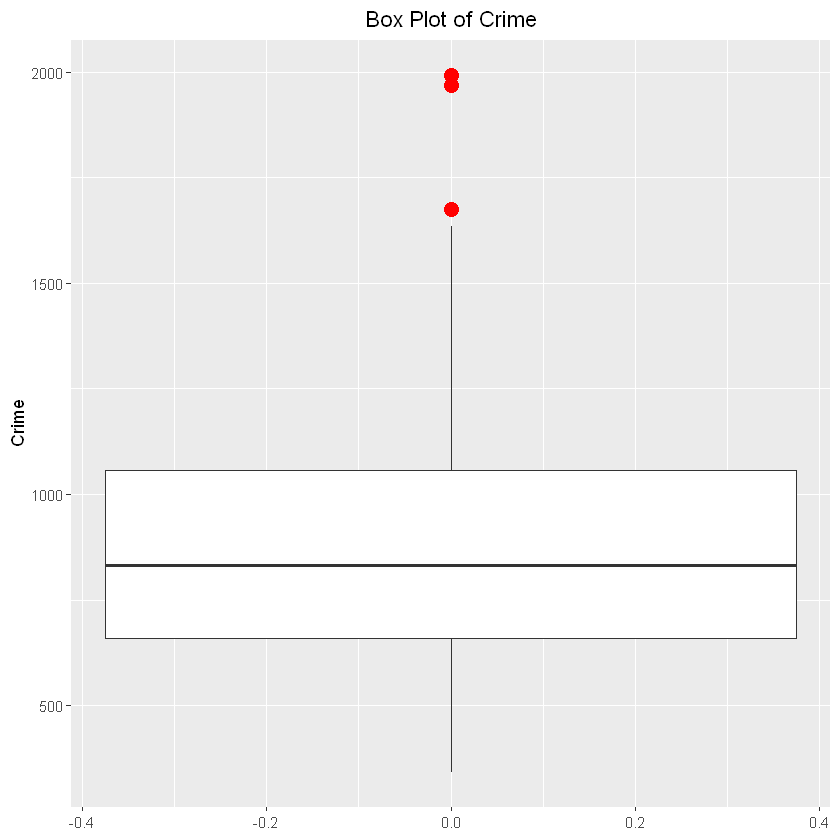

In [84]:
crime_box <- ggplot(crimeDT, aes(y=Crime)) + geom_boxplot(outlier.colour="red", outlier.size=4) + ggtitle("Box Plot of Crime") +
  theme(plot.title = element_text(hjust = 0.5))
crime_box

#### Distribution

Consistent with the box plot, we see a flat tail on the right hand side of the empirical distribution. For one thing - the skewness is around 1 and the kurtosis is larger than 3. This could be a concern because the Grubbs's test assumes that the sample is drawn from a normally distributed population. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



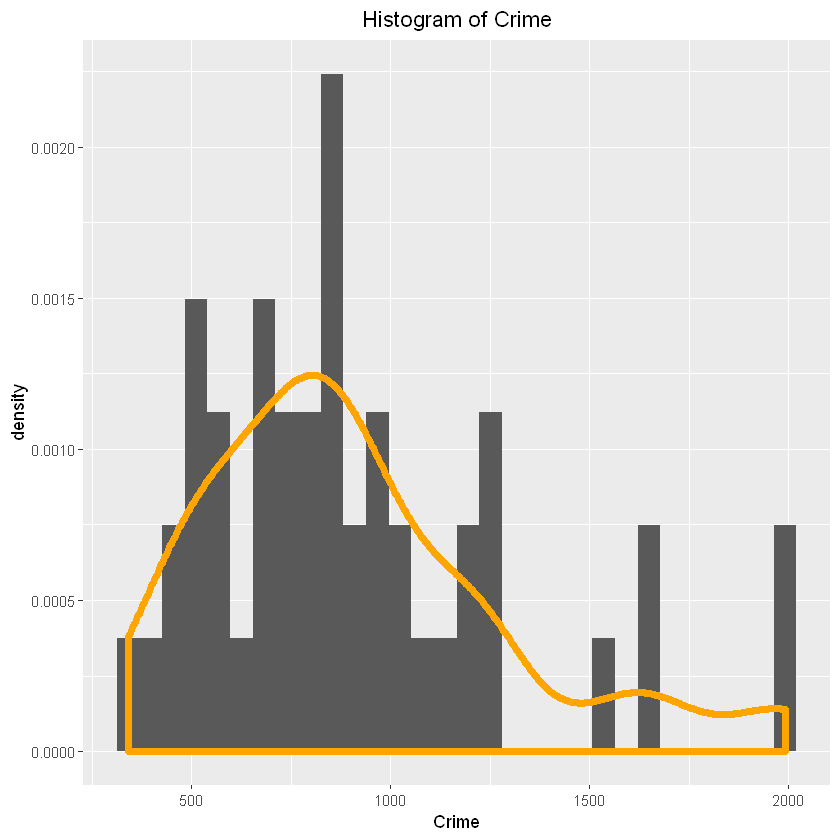

In [114]:
crime_hist <- ggplot(crimeDT, aes(x=Crime)) + geom_histogram(aes(y=..density..)) + geom_density(size=2, color="Orange") + ggtitle("Histogram of Crime") +
  theme(plot.title = element_text(hjust = 0.5))

crime_hist

In [121]:
l <- c(skewness(crimeDT[, Crime]), kurtosis(crimeDT[, Crime]))
names(l) <- c("Skewness", "Kurtosis")
print(l)

Skewness Kurtosis 
1.088480 3.943658 


## Apply the test

Nonetheless we will go on and apply the Grubbs's test on the crime data, for the time being. Some meaning of the syntax and parameters:

```R
grubbs.res <- grubbs.test(data, type, opposite, two.sided)
```

- `opposite` specifies which tail the test. `TRUE` and `FALSE` mean right and left tails.
- `type` specifies the alternative hypothesis, which can either be: 1. `10` tests for whether the most extreme sample on the tail specified by `opposite` is an outlier, 2. `20` tests for the two most exteme sample on the same tail, 3. `11` tests for whether the most extreme samples on both tails are outliers. `opposite` is overriden.
- `two.sided` specifies whether a one-sided and two-sided test should be performed
- `grubbs.res$p.value` returns the p-value of the test
- `grubbs.res$alternative` returns the alternative hypothesis in terms of the sample points being tested

### One-sided Tests on each tail

Since the Grubbs's Test applies on the sample one by one, we implement an iterative process. For each of the right/left tail:
1. Perform a one-sided test for the most extreme point. 
2. If the null is rejected, remove the candidate test from the data.
3. If the null is not rejected, stop.

Because of the sample-based nature of the Grubbs's Test, we would prefer to apply the test on each of the tail, instead of a both tails simultaneously. Under a two-sided test, a large range of the data (which is caused by either tail) might imply that the extreme points on both tails are collectively outliers - a spurious conclusion.

With a significance level of 10%, we decide that the set of outliers include (1993, 1964).

#### Right Tail

Using a significance level of 10%, we found that the two most extreme points on the right tail: 1993 and 1964 are outliers.

In [166]:
do_test <- TRUE
sig_lvl <- .1
data = crimeDT[, Crime] %>% sort
outliers_right <- c()
while (do_test) {
    res <- grubbs.test(data, 10, opposite=FALSE, two.sided=FALSE)
    if (res$p.value < sig_lvl) {outliers_right <- c(outliers_right, data[length(data)])}
    data <- data[-length(data)]
    do_test <- (res$p.value < sig_lvl & length(data) > 1)
}
outliers_right

[1] 1993 1969

#### Left Tail

Under the same significance level, we found no outliers on the left tail.

In [167]:
do_test <- TRUE
sig_lvl <- .1
data = crimeDT[, Crime] %>% sort
outliers_left <- c()
while (do_test) {
    res <- grubbs.test(data, 10, opposite=TRUE, two.sided=FALSE)
    if (res$p.value < sig_lvl) {outliers_left <- c(outliers_left, data[1])}
    data <- data[-1]
    do_test <- (res$p.value < sig_lvl & length(data) > 1)
}
outliers_left

NULL

#### Two-sided Test

For reference, we apply a similar process for two-sided tests on both tails. We found that the smallest and highest points are outliers under the same significance level. We found that the large range of data caused by the fat right tail causes the leftmost point to be identified as an outlier too, as discussed earlier.

In [193]:
grubbs.test(crimeDT[, Crime], 11, two.sided=TRUE)


	Grubbs test for two opposite outliers

data:  crimeDT[, Crime]
G = 4.26877, U = 0.78103, p-value < 2.2e-16
alternative hypothesis: 342 and 1993 are outliers


In [168]:
do_test <- TRUE
sig_lvl <- .1
data = crimeDT[, Crime] %>% sort
outliers <- c()
while (do_test) {
    res <- grubbs.test(data, 11, two.sided=TRUE)
    if (res$p.value < sig_lvl) {outliers <- c(outliers, data[c(1, length(data))])}
    data <- data[-c(1, length(data))]
    do_test <- (res$p.value < sig_lvl & length(data) > 1)
}
outliers

[1]  342 1993

## Extension: Log-Transformation

As it was noted, Normality of population is an underlying assumption in the Grubbs's Test. It is well-known in Economics that fat tails in social-economic data series often arise from log-Normal distributions. We apply a log-transformation on `Crime`, which if the series is log-normal will result in a series closer to a normal distribution.

The histogram, and box plots indicates that `log_Crime` might is closer to Normality than `Crime`. Also, the Grubbs's Test suggest that there is no outliers in `log_Crime`.

As noted in Charu Aggarwal's [Outlier Analysis](http://charuaggarwal.net/outlierbook.pdf), definitions of outliers are largely semantic and vary with respect to choices of data models. If we consider `Crime` as a sample from a log-Normal distribution, the fat tail simply arises from the skewed nature of the distribution, and are not anamolies in fact.

I personally prefer this interpretation because the application of Grubbs's Test has a robust justification (Normality).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



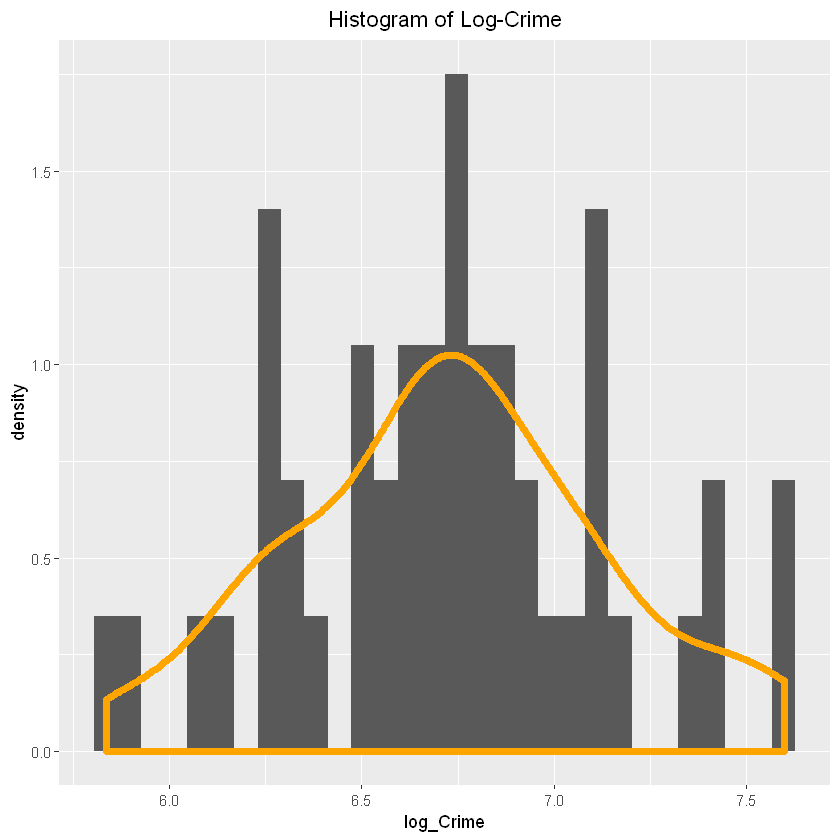

In [179]:
crimeDT[, log_Crime:=log(Crime)]

crime_hist <- ggplot(crimeDT, aes(x=log_Crime)) + geom_histogram(aes(y=..density..)) + geom_density(size=2, color="Orange") + ggtitle("Histogram of Log-Crime") +
  theme(plot.title = element_text(hjust = 0.5))

crime_hist

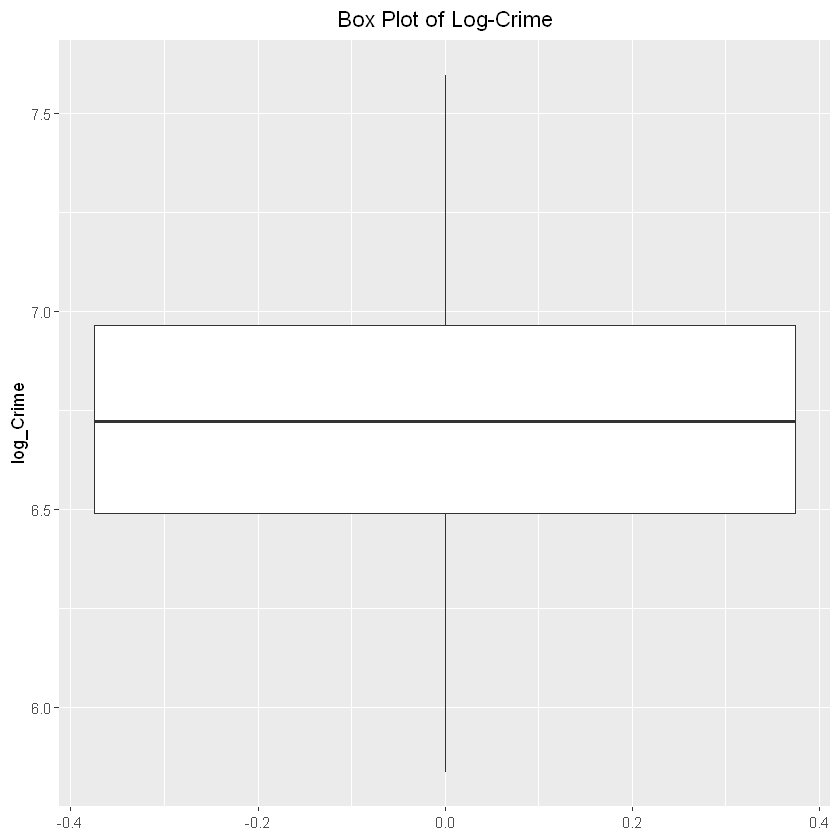

In [177]:
crime_box <- ggplot(crimeDT, aes(y=log_Crime)) + geom_boxplot(outlier.colour="red", outlier.size=4) + ggtitle("Box Plot of Log-Crime") +
  theme(plot.title = element_text(hjust = 0.5))
crime_box

In [174]:
do_test <- TRUE
sig_lvl <- .1
data = crimeDT[, log_Crime] %>% sort
outliers_right <- c()
while (do_test) {
    res <- grubbs.test(data, 10, opposite=FALSE, two.sided=FALSE)
    if (res$p.value < sig_lvl) {outliers_right <- c(outliers_right, data[length(data)])}
    data <- data[-length(data)]
    do_test <- (res$p.value < sig_lvl & length(data) > 1)
}

do_test <- TRUE
sig_lvl <- .1
data = crimeDT[, log_Crime] %>% sort
outliers_left <- c()
while (do_test) {
    res <- grubbs.test(data, 10, opposite=TRUE, two.sided=FALSE)
    if (res$p.value < sig_lvl) {outliers_left <- c(outliers_left, data[1])}
    data <- data[-1]
    do_test <- (res$p.value < sig_lvl & length(data) > 1)
}

print(paste("Outliers on the right tail:", outliers_right))
print(paste("Outliers on the left tail:", outliers_left))

[1] "Outliers on the right tail: "
[1] "Outliers on the left tail: "


# Question 6.1

Describe a situation or problem from your job, everyday life, current events, etc., for which a Change Detection model would be appropriate. Applying the CUSUM technique, how would you choose the critical value and the threshold?

# Answers to 6.1

An applicable situation for which a Change Detection model would be appropriate would be to test the effect of vaccine on the __growth__ of COVID-19 cases. Specifically, if $\gamma_0$ is the prevailing growth rate of COVID cases in the US, we would like to observe, since the launch of the vaccine, whether the underlying growth has dropped below $\gamma_0$.

Recall that the CUSUM statistic for a decrease detection is defined as:

\begin{align*}
S_n^- = [S_{n-1}^- - (x_n - \gamma_0 + T), 0]^+
\end{align*}

We can start by choosing variables and parameters as follow:
- $\{x_n\}$ is the growth, or change in COVID cases from period $n-1$ to $n$ for a administrative region sharing the same regime. Period $n$ need not be the unit of finest grandularity (e.g. daily). As discussed in 6.2, forming rational subgroups (say, weekly) can create comparisons that are more apples-to-apples as it absorbs weekly variations (which may emerge from behavioral patterns over the week, e.g. going outside more often in the weekend, hospitals busier in the weekends and test results delayed, etc). If relevant to the research question, we may also to focus on the particular age group that receive vaccines.
- $\gamma_0$ is the original growth rate. We can take the mean growth rate before the regime change, say the mean growth rate of several weeks before the launch of vaccine programs.
- $T$ is the tolerance parameter. We can set $T = \gamma_1 - \nu$ where $\gamma_1$ is the target growth rate. $\nu$ will be determined by the noise of the data to prevent type I errors. Alternatively, we can refer to [Montgomery's Text](http://ie.sharif.edu/~qc/Introduction%20to%20statistical%20qulity%20control,%206th%20edition.pdf) (p.408) which suggests that the tolerance be taken as $\frac{\delta\sigma}{2}$ where $\delta$ is the hypothesized change in multitudes of $\sigma$.
- $L$ is the critical value for deicision. We can start with $5 \sigma$, as per Montgomery.

# Question 6.2

1.	Using July through October daily-high-temperature data for Atlanta for 1996 through 2015, use a CUSUM approach to identify when unofficial summer ends (i.e., when the weather starts cooling off) each year.  You can get the data that you need from the file temps.txt or online, for example at http://www.iweathernet.com/atlanta-weather-records  or https://www.wunderground.com/history/airport/KFTY/2015/7/1/CustomHistory.html .  You can use R if you’d like, but it’s straightforward enough that an Excel spreadsheet can easily do the job too.

2.	Use a CUSUM approach to make a judgment of whether Atlanta’s summer climate has gotten warmer in that time (and if so, when).


# Answers to 6.2

## Preliminary Analysis

First we stack the two-dimensional data frame to form a univariate time series for the daily temperature of Atlanta in the summer over the course of 21 years from 1996 to 2015. Each color corresponds to a year and the black solid line is the yearly average temperature. <i>At first glance</i>, apart from the spike in 2011, there does not seem to be a change in the climate.

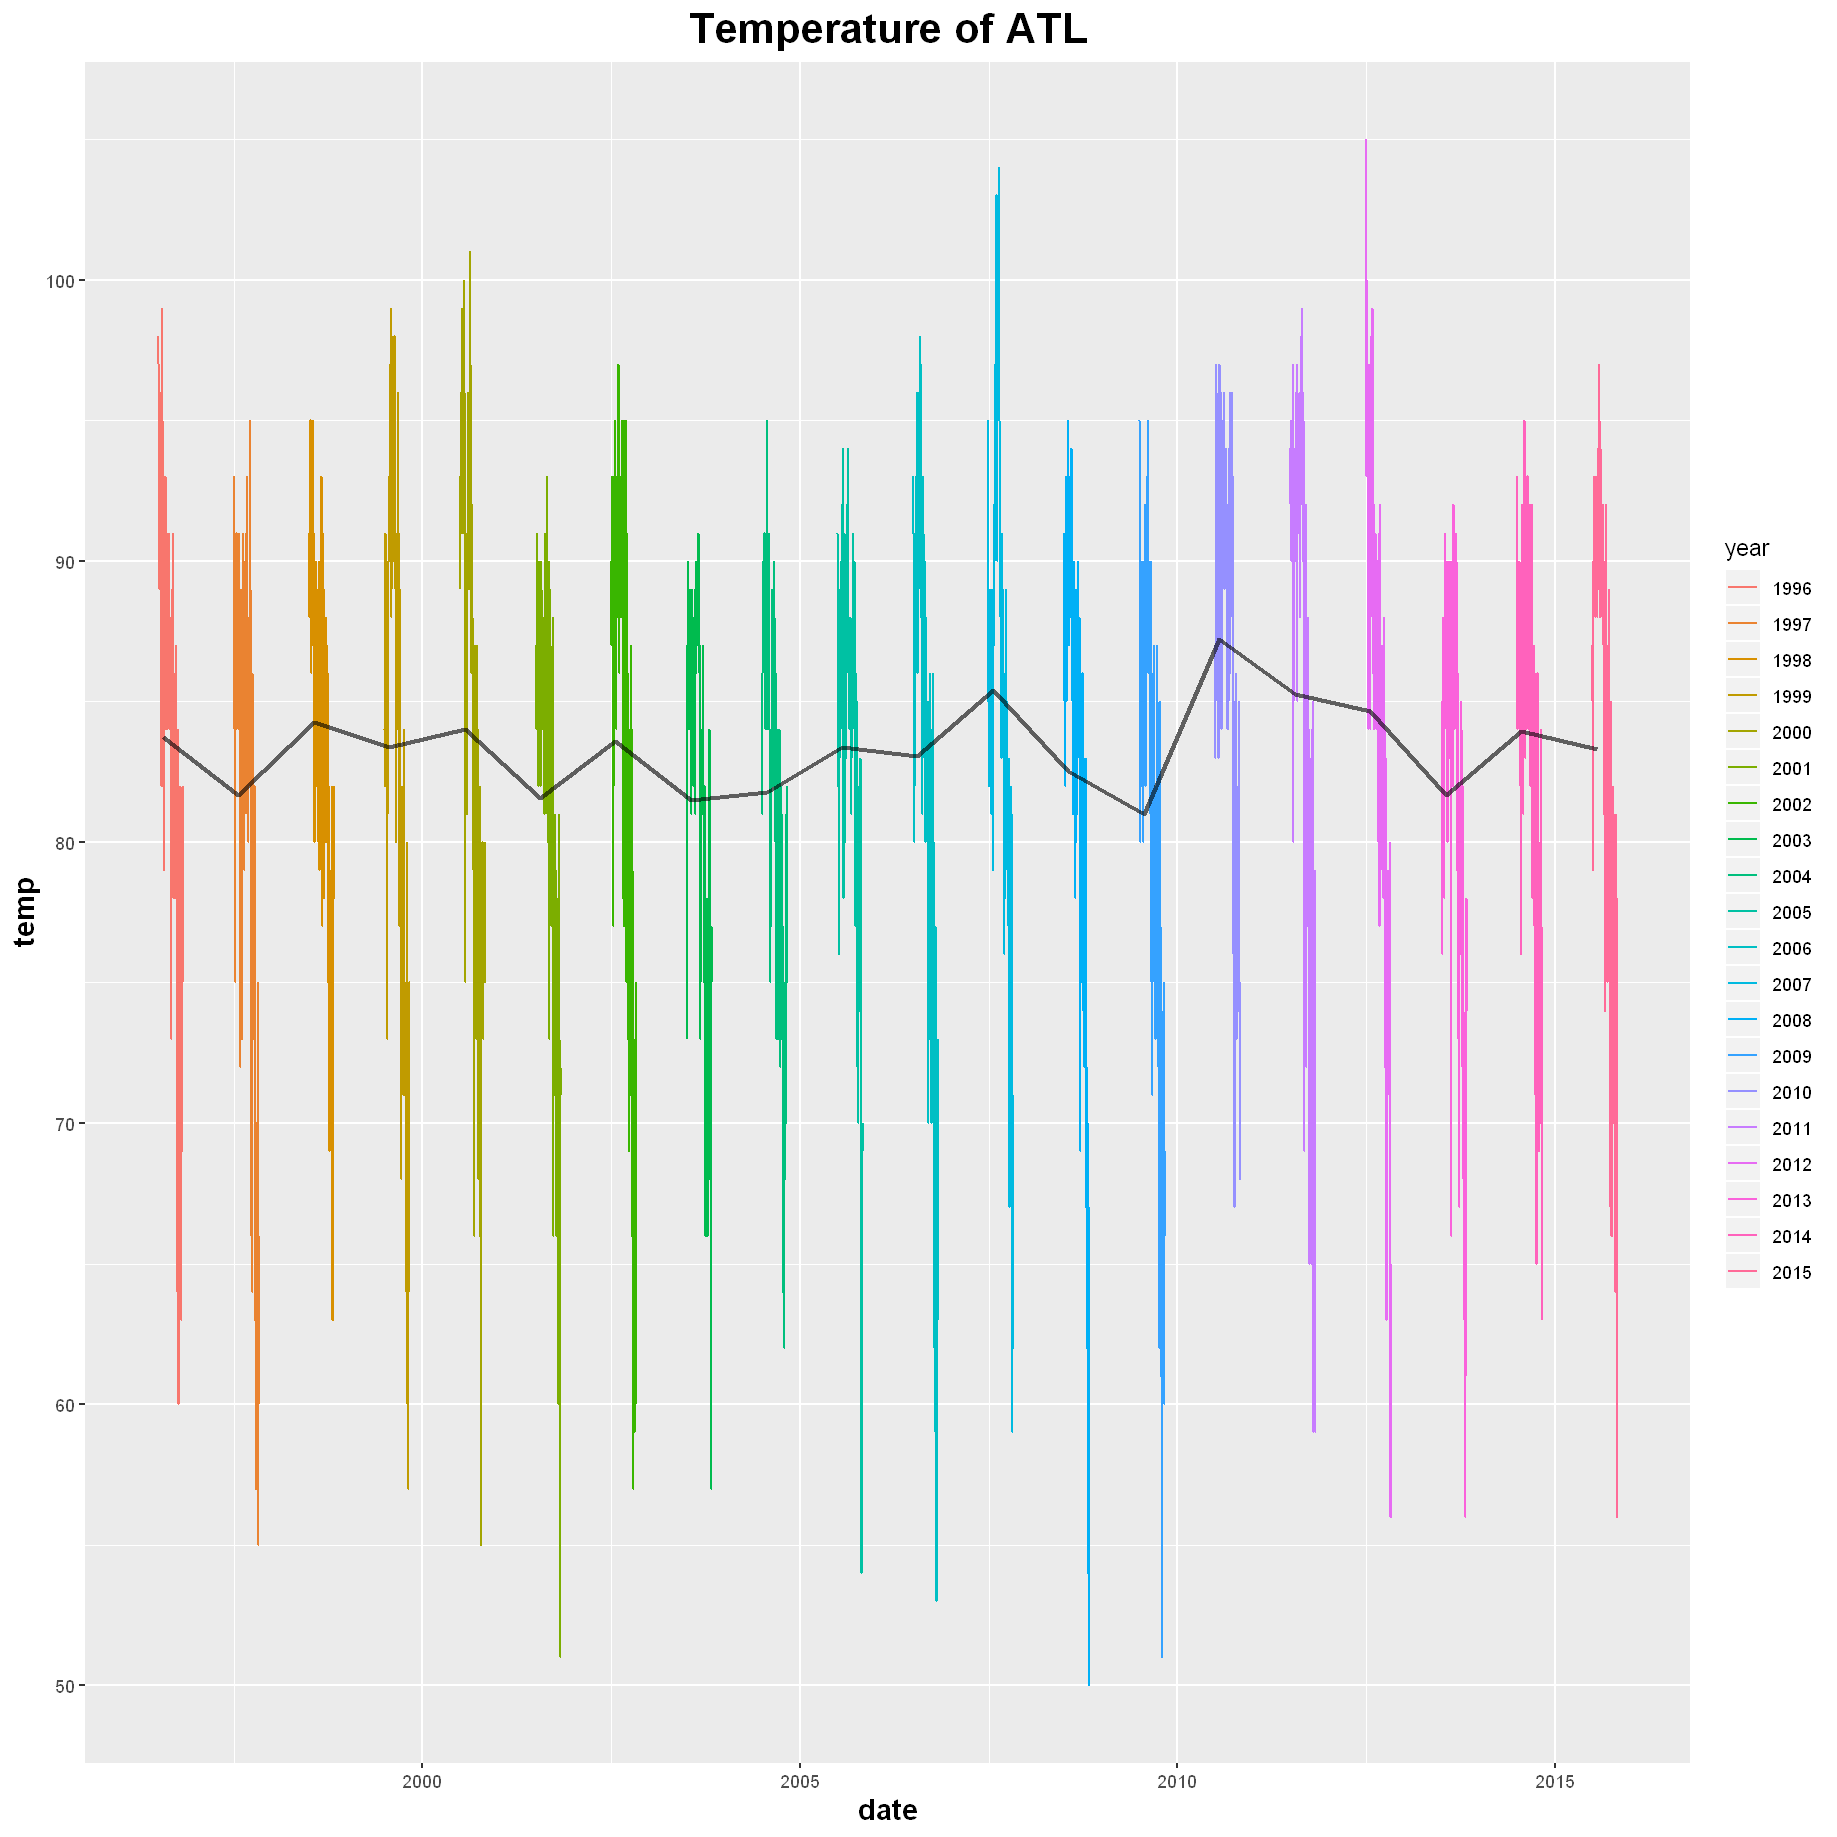

In [668]:
# plot time series
ATL_temp <- fread("./hw3/temps.txt", header=TRUE, integer64="numeric") %>% setkey(DAY)

year_col = names(ATL_temp)[-1]
ATL_temp[, year_col] <- ATL_temp[, lapply(.SD, as.numeric, na.rm=TRUE), .SDcols=year_col]

ATL_temp_ts <- melt(ATL_temp, value.name="temp", variable.name = "year", id.vars="DAY")
ATL_temp_ts[, date:=paste0(DAY,'-',year) %>% as.Date(format('%d-%b-%Y'))]
ATL_temp_ts <- ATL_temp_ts[order(date)]

ATL_temp_ts_avg <- ATL_temp_ts[, .(temp=mean(temp)), by=.(year)]
ATL_temp_ts_avg[, year:=as.character(year)]
ATL_temp_ts_avg[, `:=`(agg='AVG', day=as.Date(paste('23-Jul-',year), format='%d-%b-%Y'))]

ATL_temp_ts_avg <- ATL_temp_ts[, .(temp=mean(temp)), by=.(year)]
ATL_temp_ts_avg[, year:=as.character(year)]
ATL_temp_ts_avg[, `:=`(agg='AVG', day=as.Date(paste('23-Jul-',year), format='%d-%b-%Y'))]

# resize 
figsize <- 150
options(repr.plot.width = sqrt(figsize), repr.plot.height = sqrt(figsize), repr.plot.res = figsize)
plt <- ggplot() + geom_line(data=ATL_temp_ts, aes(x=date, y=temp, color=year)) + ggtitle("Temperature of ATL") + 
geom_line(data=ATL_temp_ts_avg, aes(x=day, y=temp, color=agg), size=1, color="Black", alpha=0.6) +
    theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20), 
          axis.title.x=element_text(face = "bold", size = 14),
          axis.title.y=element_text(face = "bold", size = 14))
plt

#### Heatmap

Below is a heat map representation of the daily temperatures, where the horizontal and vertical dimensions correspond to day and year respectively. We do see more white's on the left hand side, suggesting that cool days were more common in earlier years.

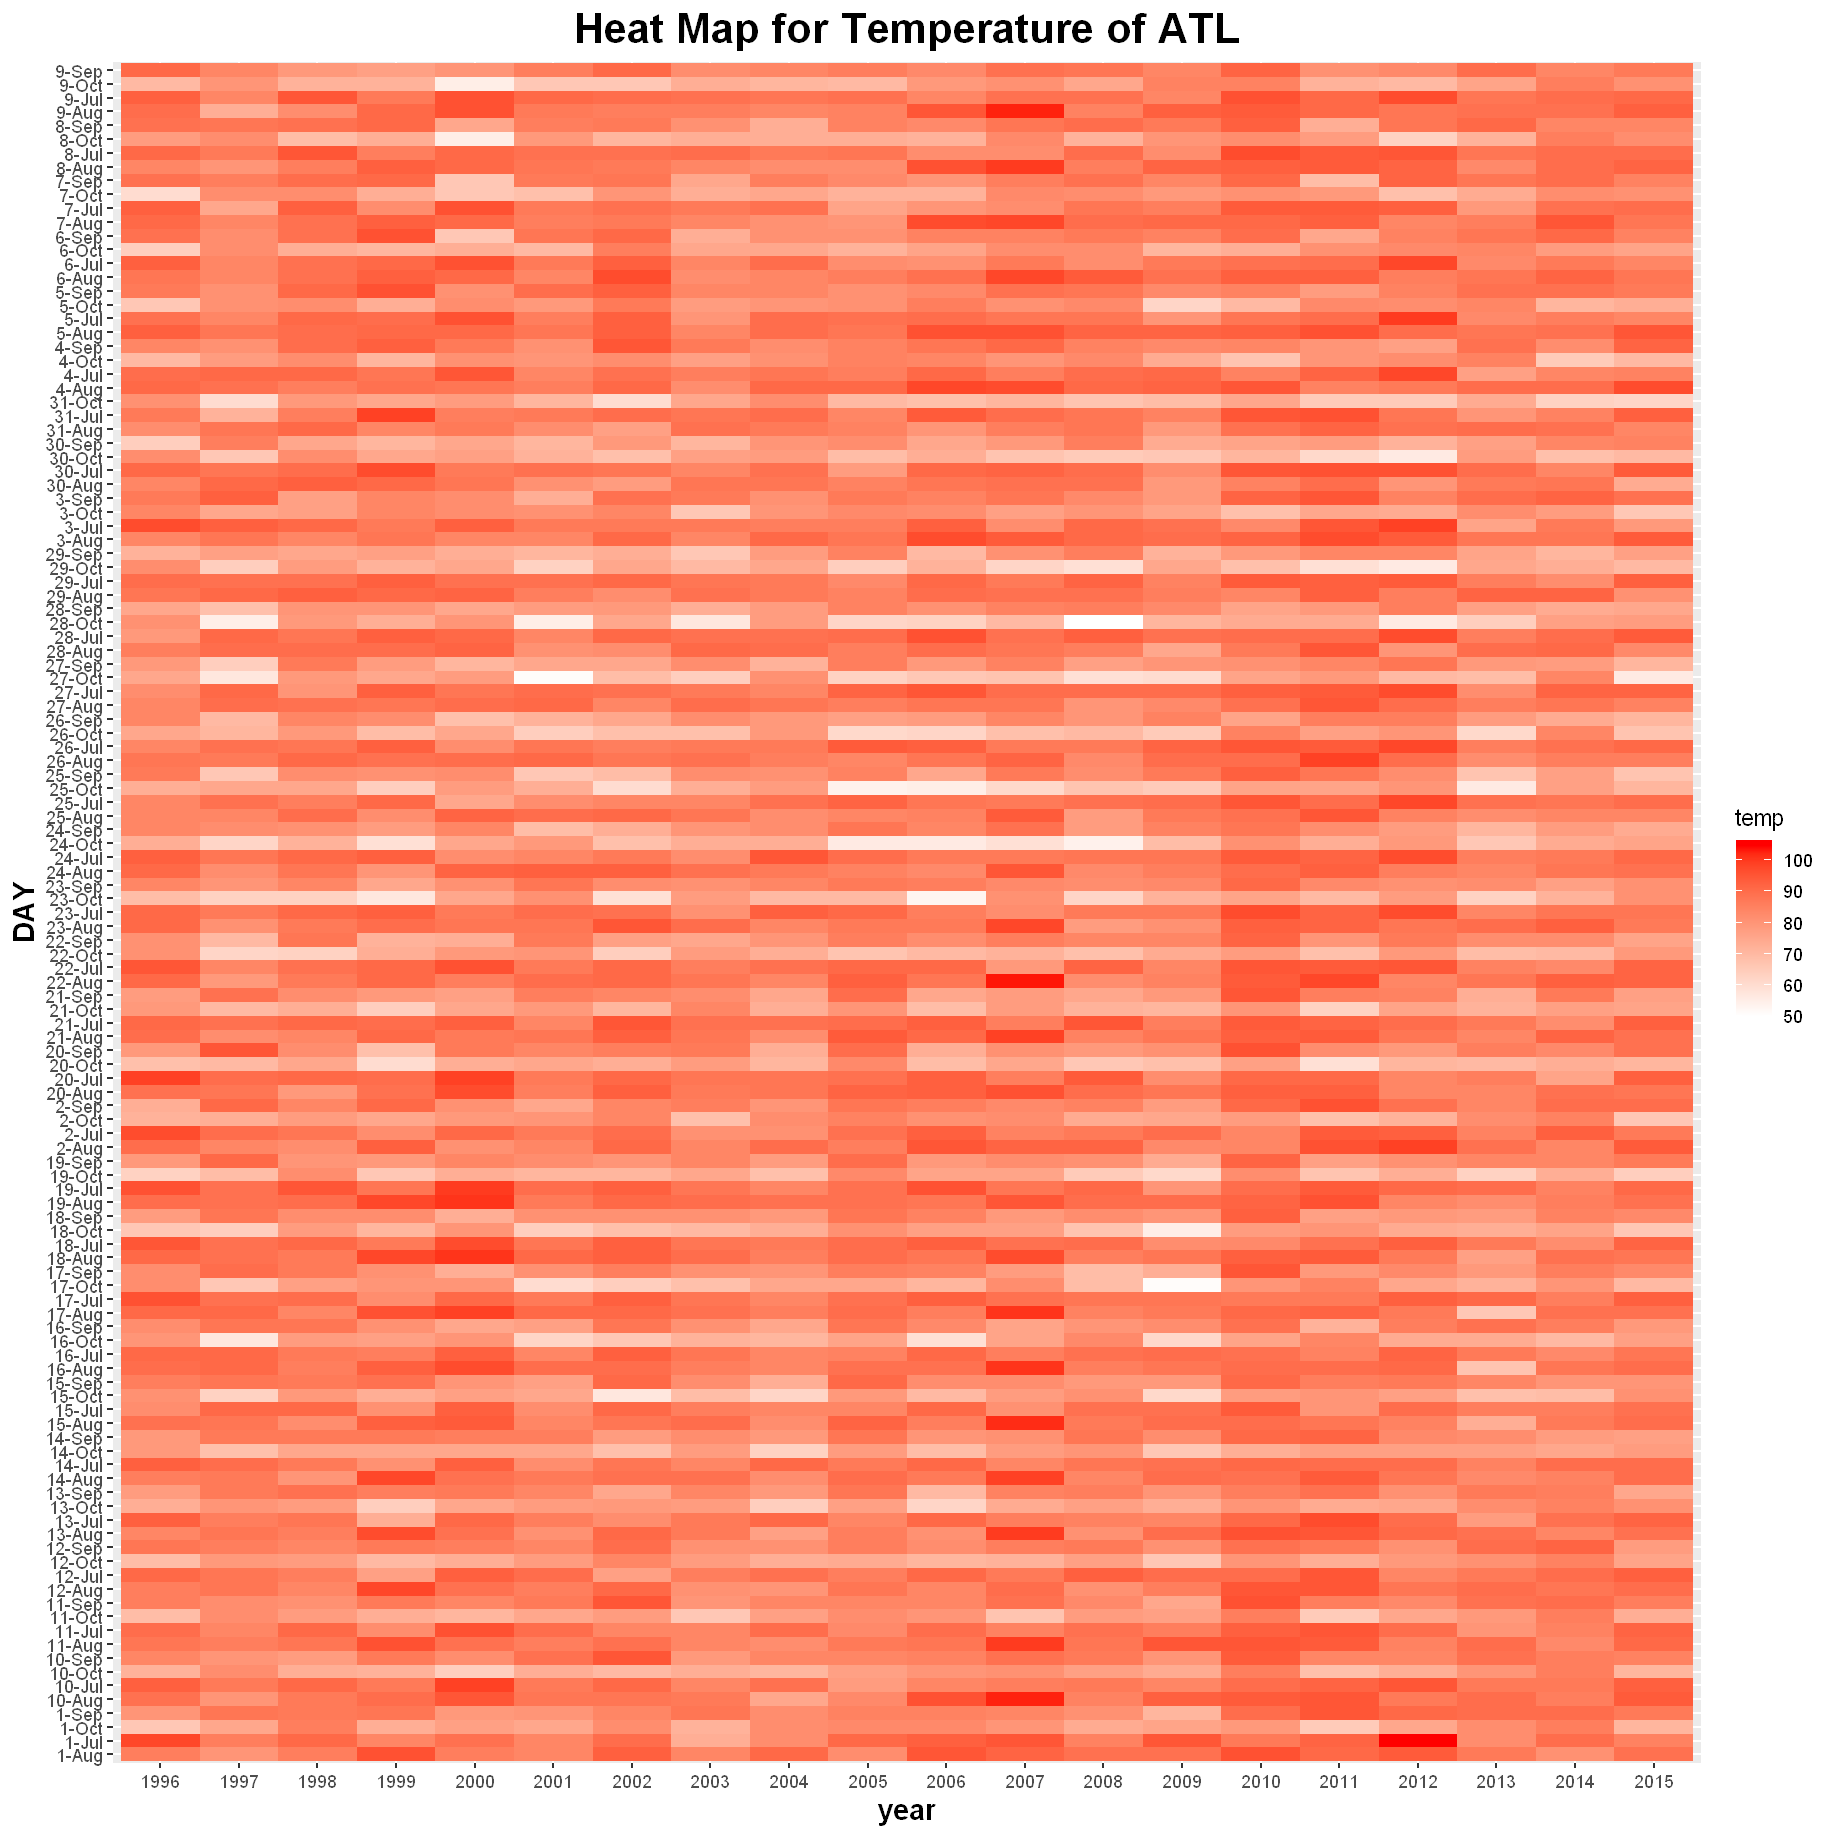

In [669]:
# heatmap
ggplot(data=ATL_temp_ts, aes(x=year, y=DAY, fill=temp)) + geom_tile() + scale_fill_gradient(low="white", high="red") + 
ggtitle("Heat Map for Temperature of ATL") + 
theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20), 
      axis.title.x=element_text(face = "bold", size = 14),
      axis.title.y=element_text(face = "bold", size = 14))

#### Box Plot

Box plots are useful for inspecting changes in distributions over the years. In terms of overall distributions in the summer, there are quite some movements of the quartiles in 2010 and 2011, while the trend seemed to regress to the norm afterwards. Even if there's not a change in climate in terms of first moments, we note that there might be changes in distributions based on the box plots - in particular there might be changes in terms of higher moments. Nonetheless, this is out of context for this analysis. Next, we will device CUSUM charts to detect changes in temperatures.

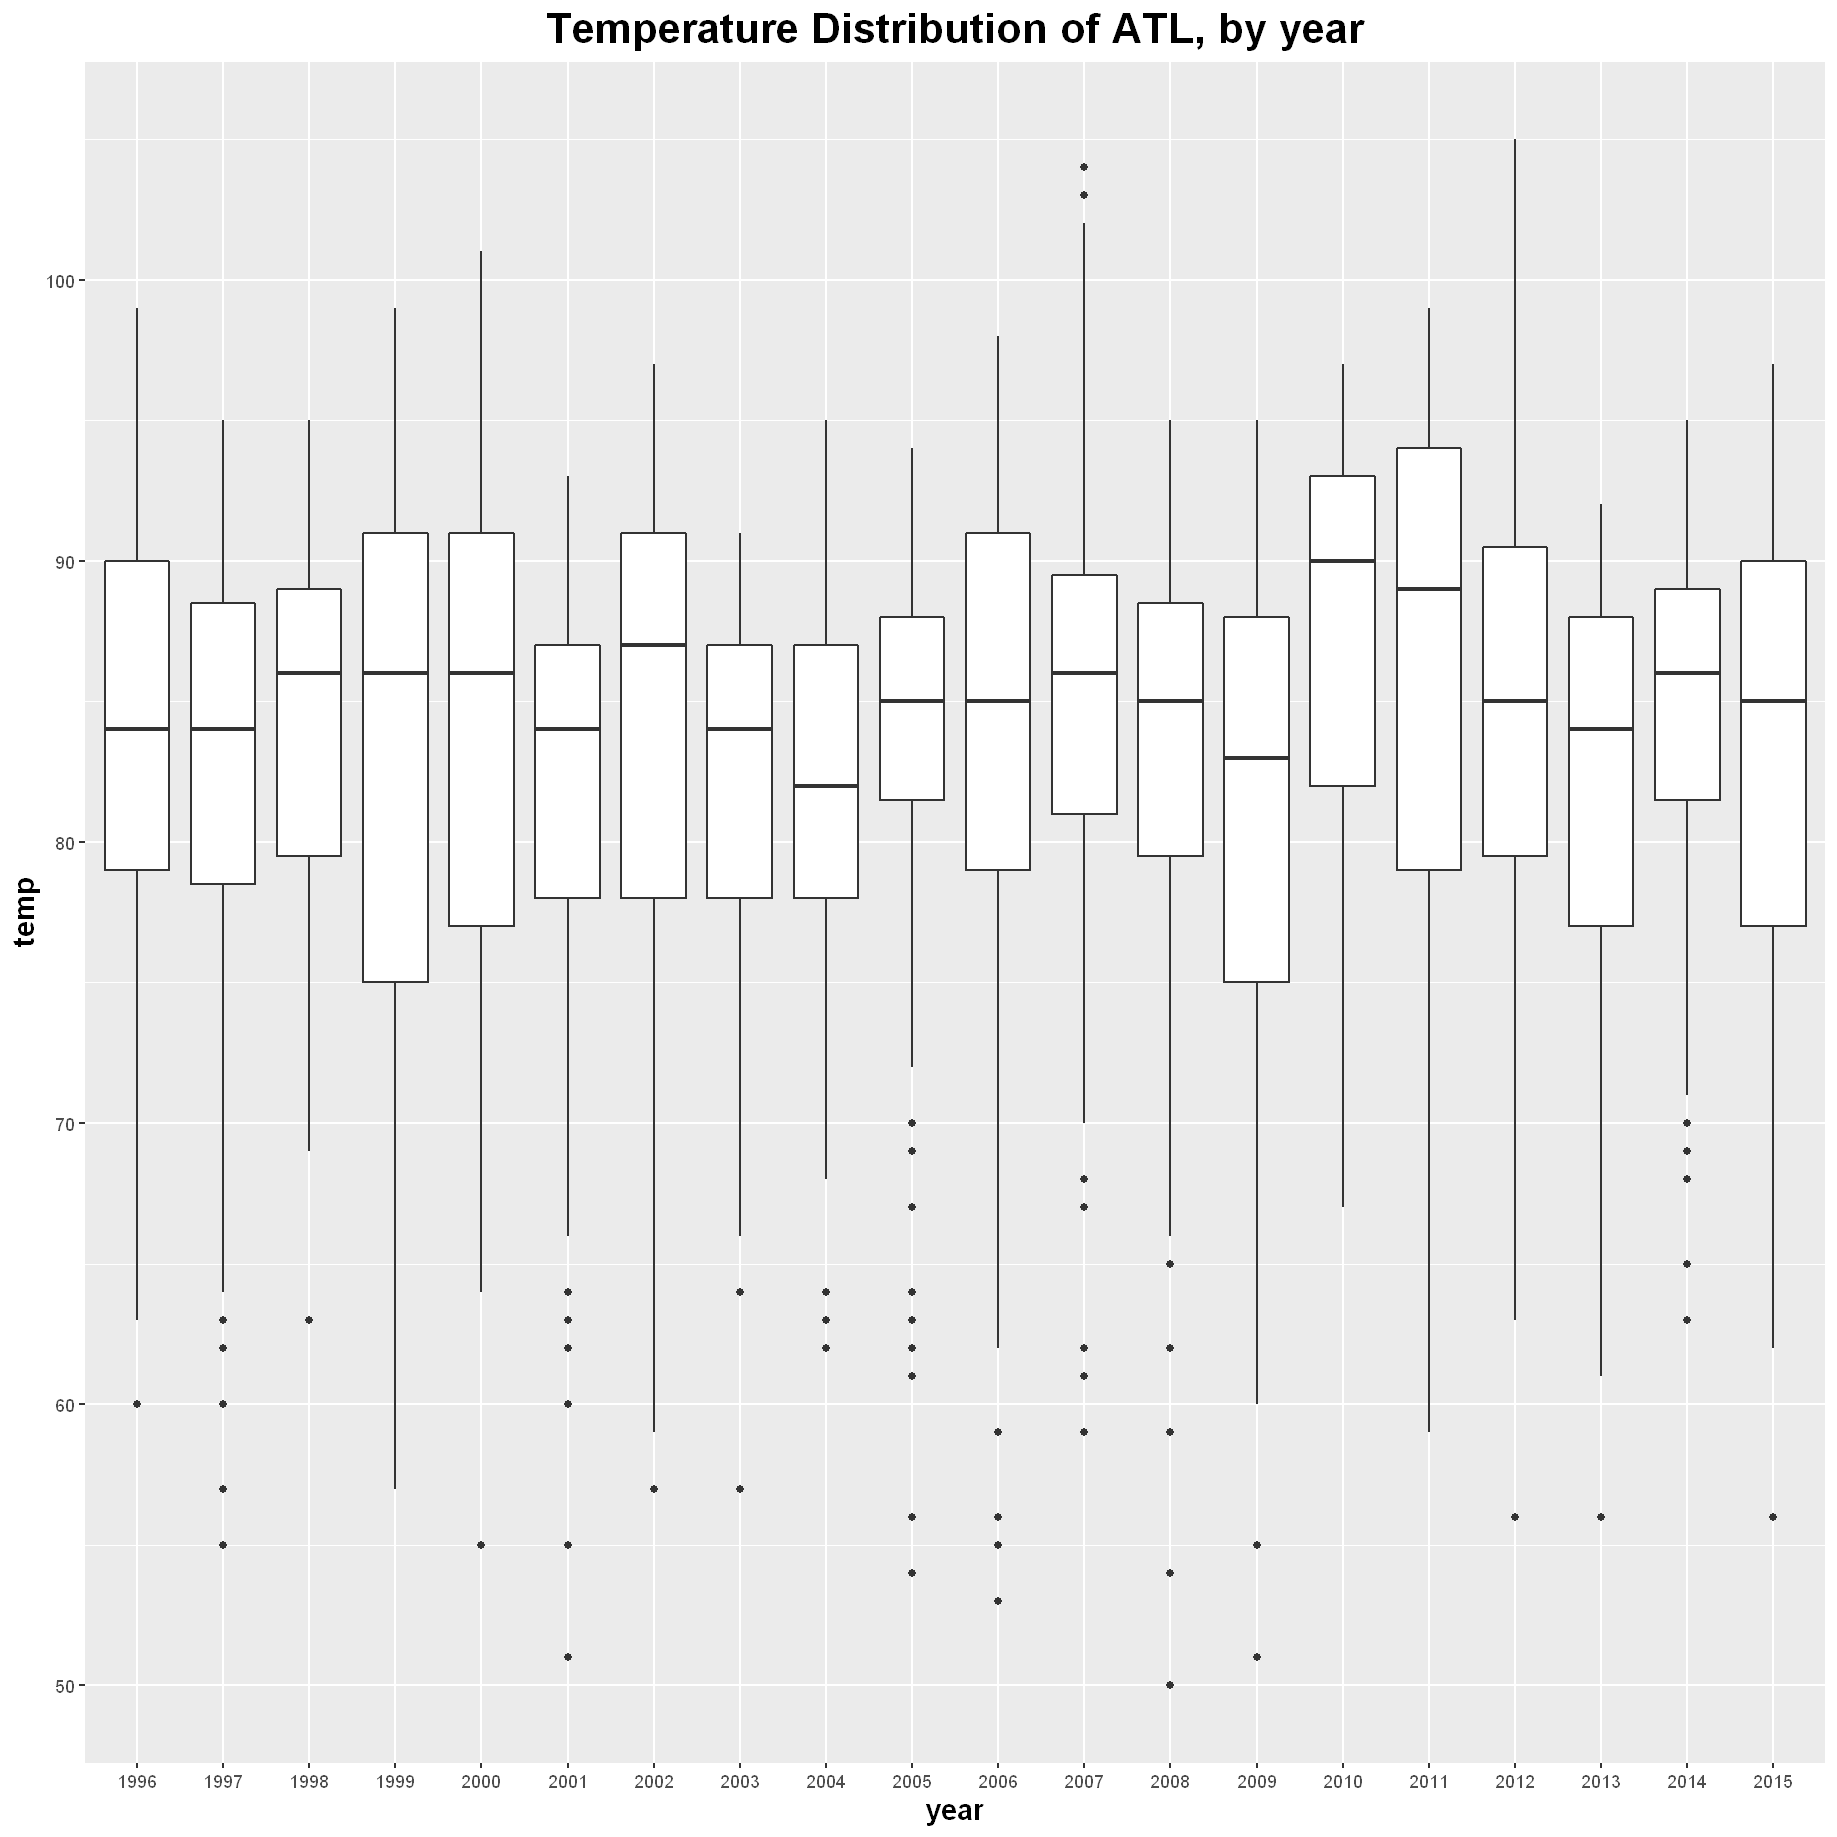

In [670]:
figsize <- 150
options(repr.plot.width = sqrt(figsize), repr.plot.height = sqrt(figsize), repr.plot.res = figsize)

ggplot(ATL_temp_ts) + geom_boxplot(aes(x=year, y=temp)) + ggtitle("Temperature Distribution of ATL, by year") +
theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20), 
      axis.title.x=element_text(face = "bold", size = 14),
      axis.title.y=element_text(face = "bold", size = 14))

## Devicing a CUSUM chart for change detection

For a data series $\{x_n\}$, the CUSUM statistic is recursively defined as: $S_n = [S_{n-1} + (x_n - \mu - T)]^+$ and $S_0 = 0$. The decision rule is to take action if $S_n \geq L$. The tuning for a CUSUM chart accounts for:
- $\mu$: the target metric when the process generating $x$ satisifies the null ("in control" in the context of quality monitoring)
- $T$: the tolerance threshold deciding when a positive response above $\mu$ should be accounted, to prevent the CUSUM chart to be extra sensitive
- $L$: the boundary of decision

The choice of $\mu$ in this context of detecting an increase in temperature is relatively straight forward than the other parameters. Because the nature of the question to answer concerns a "change", we can express the null and alternative as "no change from beginning" and "increased from beginning" - in other words, it suffices for us to define "beginning", as well as a metric that represents the data generating process from this time frame. __Heuristically__, looking at the line plots, heatmap, and the box plot, I would consider <u>1996 through 1998</u> a rather stationary period. Also, I consider the mean a good measure to represent the overall temperature for an extended period. Empirically, this value of $\mu$ is 83.22 degrees Fahrenheit.

Credits to Piazza note @971 by Daniel Martin Baquero and Nathan Benjamin Mcclure based on p.408 of [Montgomery's Text](http://ie.sharif.edu/~qc/Introduction%20to%20statistical%20qulity%20control,%206th%20edition.pdf), a rule of thumb is derived from empirical calibrations that balances reducing type I error (false alarms) and a short average run length (run time before detection):
- Find standard deviation of $\sigma$ from reference period (formally, $\frac{\sigma}{\sqrt{n}}$ for each rational subgroup)
- Start with $L = 4\sigma$ or $5\sigma$
- For a detection target with shift size $\delta \sigma$, start with $T = \frac{\delta \sigma}{2}$

This rule is also applied in [the study of climate change in Zimbabwe](https://www.cabdirect.org/cabdirect/abstract/20133058736). I started with finding $\sigma$ equals standard deviation in from the reference period, <u>1996 through 1998</u>, which is 8.24 degrees. For $\delta$, as global warming is often described as a [1.5 degrees Celsius](https://climaterealityproject.org/blog/why-15-degrees-danger-line-global-warming) (2.7 degrees Fahrenheit) increase in Earth's temperature, I will use this $\delta = \frac{2.7}{2\sigma}$, or simply $T = \frac{2.7}{2}$. It is noted that this rule of thumb is likely derived from normally distributed samples, which may not be our case and further finetuning is needed.

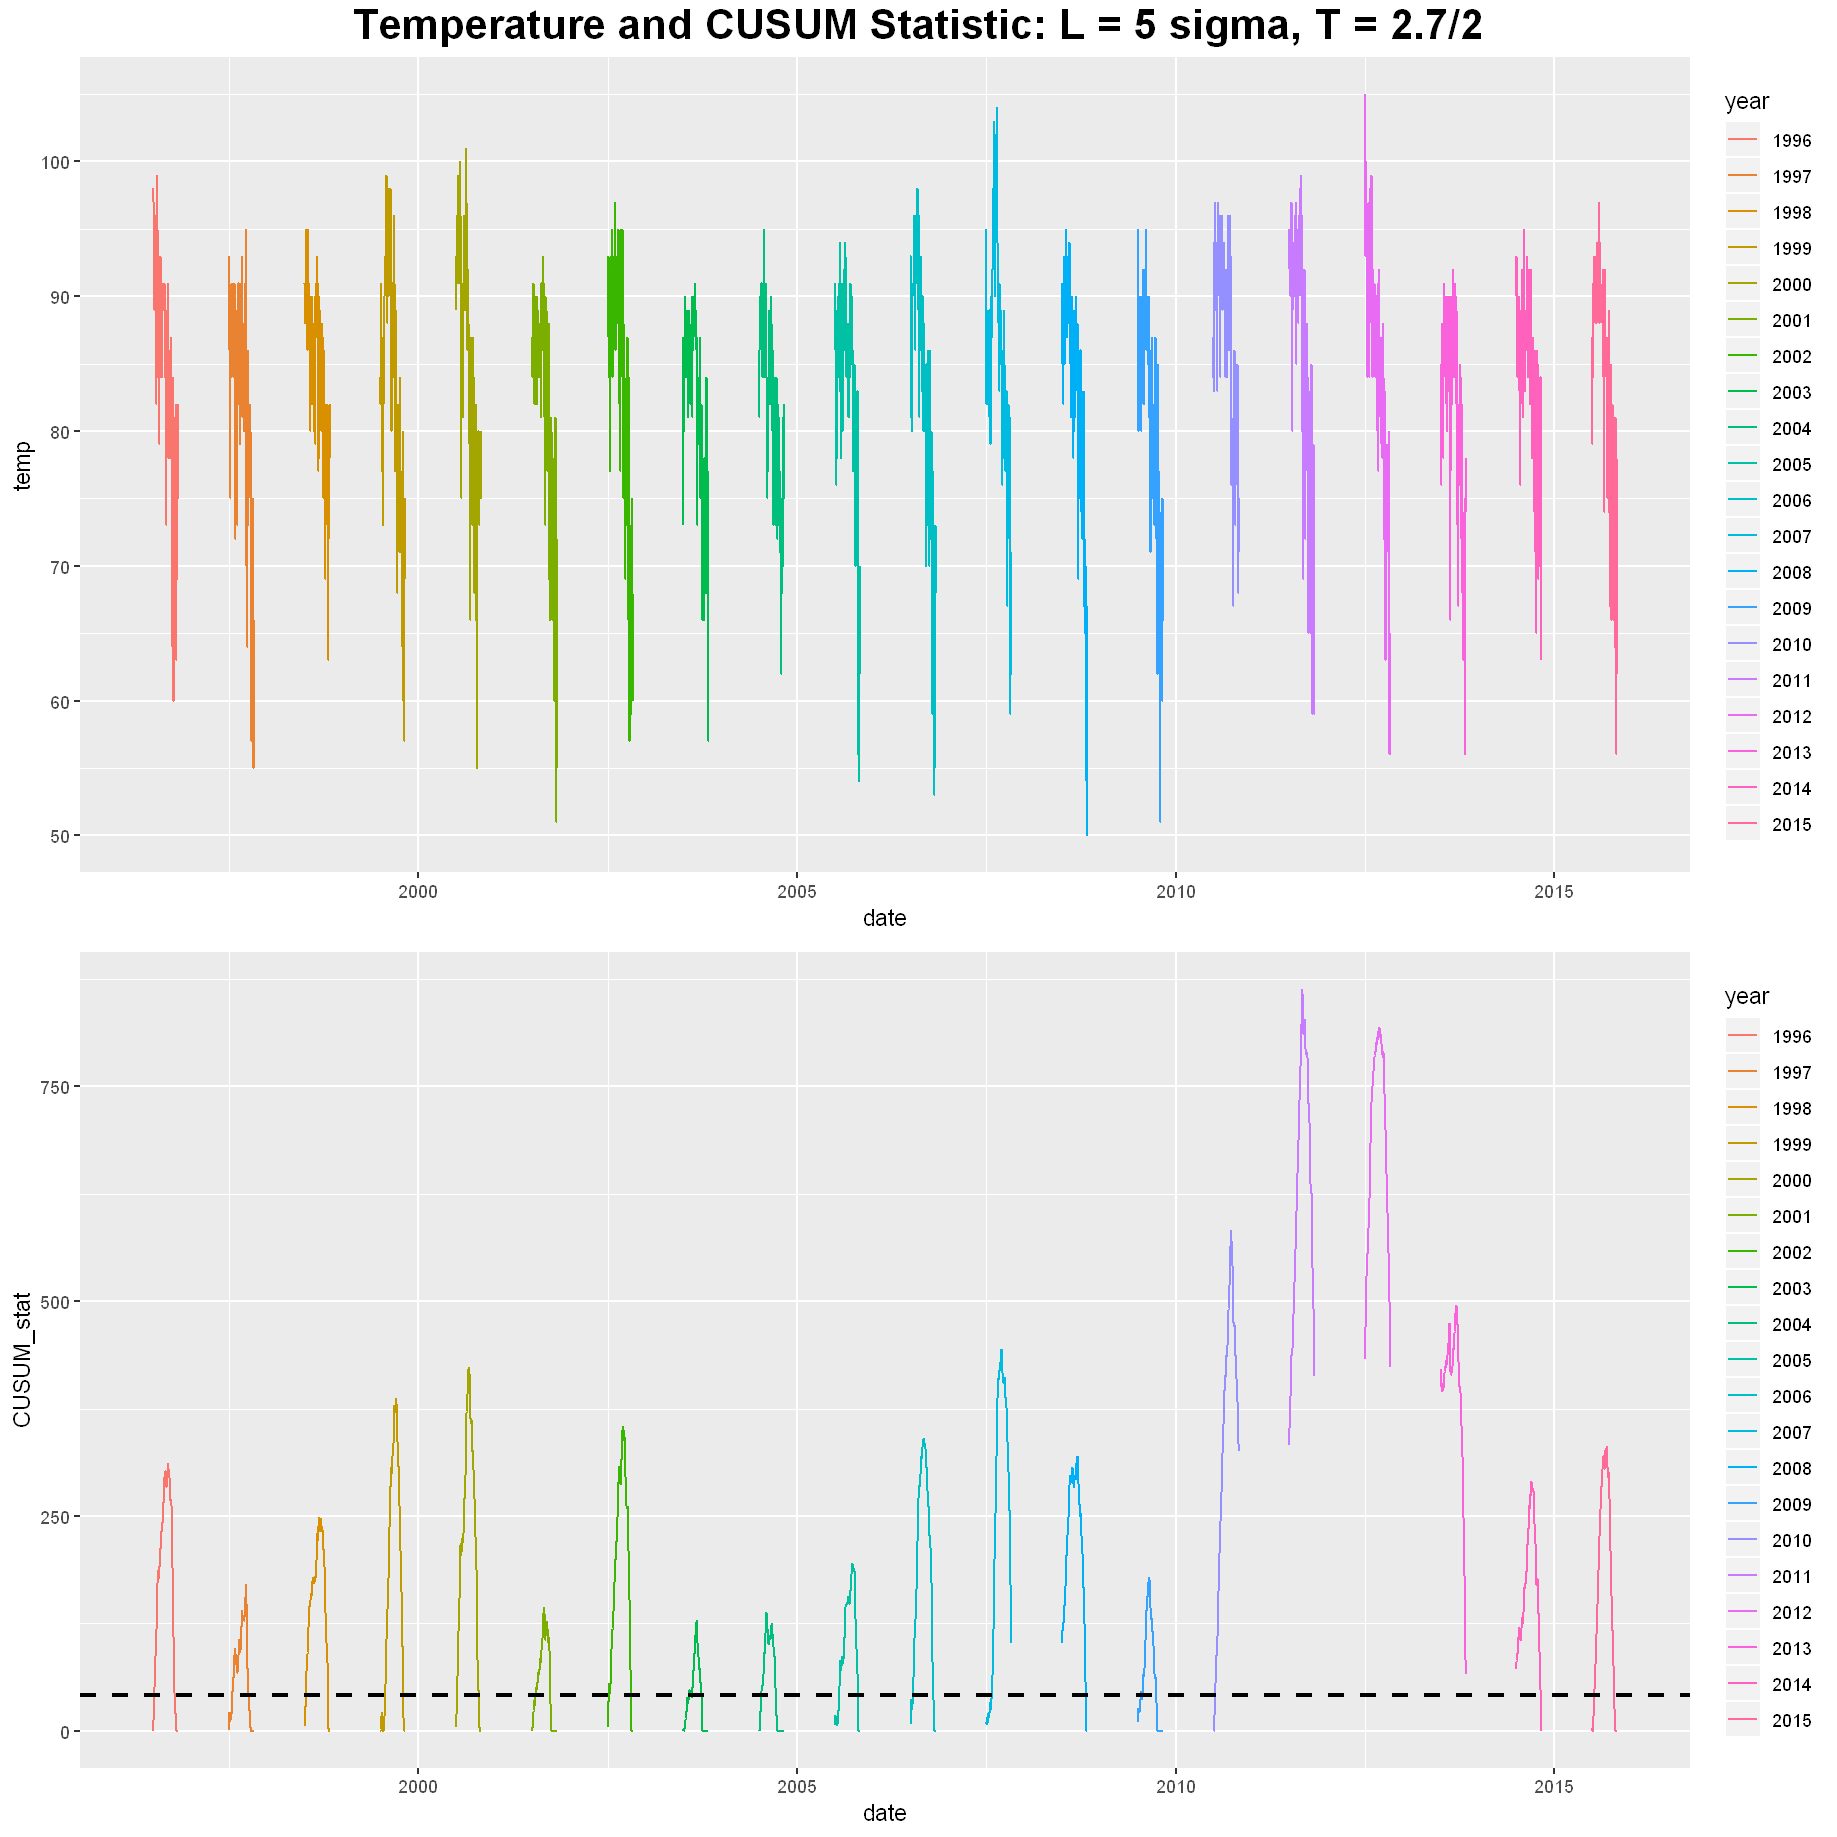

In [718]:
norm_years = c(1996:1998)
mu <- ATL_temp_ts[ATL_temp_ts[, year] %in% norm_years, temp] %>% mean
sigma <- ATL_temp_ts[ATL_temp_ts[, year] %in% norm_years, temp] %>% sd

T <- 2.7 / 2
L <- 5 * sigma

S <- numeric(ATL_temp_ts[, .N])
S[1] <- 0
for (i in 2:ATL_temp_ts[, .N]) {
    s = S[i-1] + ATL_temp_ts[i, temp] - T - mu
    S[i] = s * (s > 0)
}

ATL_temp_ts[, CUSUM_stat:=S]

plt1 <- ggplot() + geom_line(data=ATL_temp_ts, aes(x=date, y=temp, color=year))
plt2 <- ggplot(data=ATL_temp_ts, aes(x=date, y=CUSUM_stat, color=year)) + geom_line() + geom_hline(yintercept = L, color="black", size=1, linetype="dashed")

fig <- ggarrange(plt1, plt2, nrow=2, ncol=1)
annotate_figure(fig,
    top = text_grob("Temperature and CUSUM Statistic: L = 5 sigma, T = 2.7/2", size = 20, face="bold"),
)

#### The Need for Finetuning

It looks like the CUSUM chart is overly sensitive with the settings above. One observation is that daily variation are around 3 degree Fahrenheit. So the the usual increase in temperature will contribute to increase the values of CUSUM statistics. We will need to finetune the tolerance $T$ and decision boundary $L$ to obtain a reasonable CUSUM chart.

In [684]:
# look at mean daily increase/decrease!
ATL_temp_ts[, diff := temp - shift(temp), by = year]
print(ATL_temp_ts[!is.na(diff), .(mean=mean(diff)), by=.(diff > 0)])

   diff > 0      mean
1:    FALSE -3.192249
2:     TRUE  3.411032


#### Finetuned Version

We obtain a CUSUM chart that looks more "reasonable" by setting $L = 5\sigma$ and $T = \sigma$. Apparently, there were slight increases in mean summer temperature back in 1999 and 2000. Since 2007 these anamolies become more common, as above threshold CUSUM statistics were observed in 2007, 2010, 2011, 2012. The CUSUM does not reject that 2013-14 are not different from the beginning, but we will need more years to tell whether it has regressed to the mean.

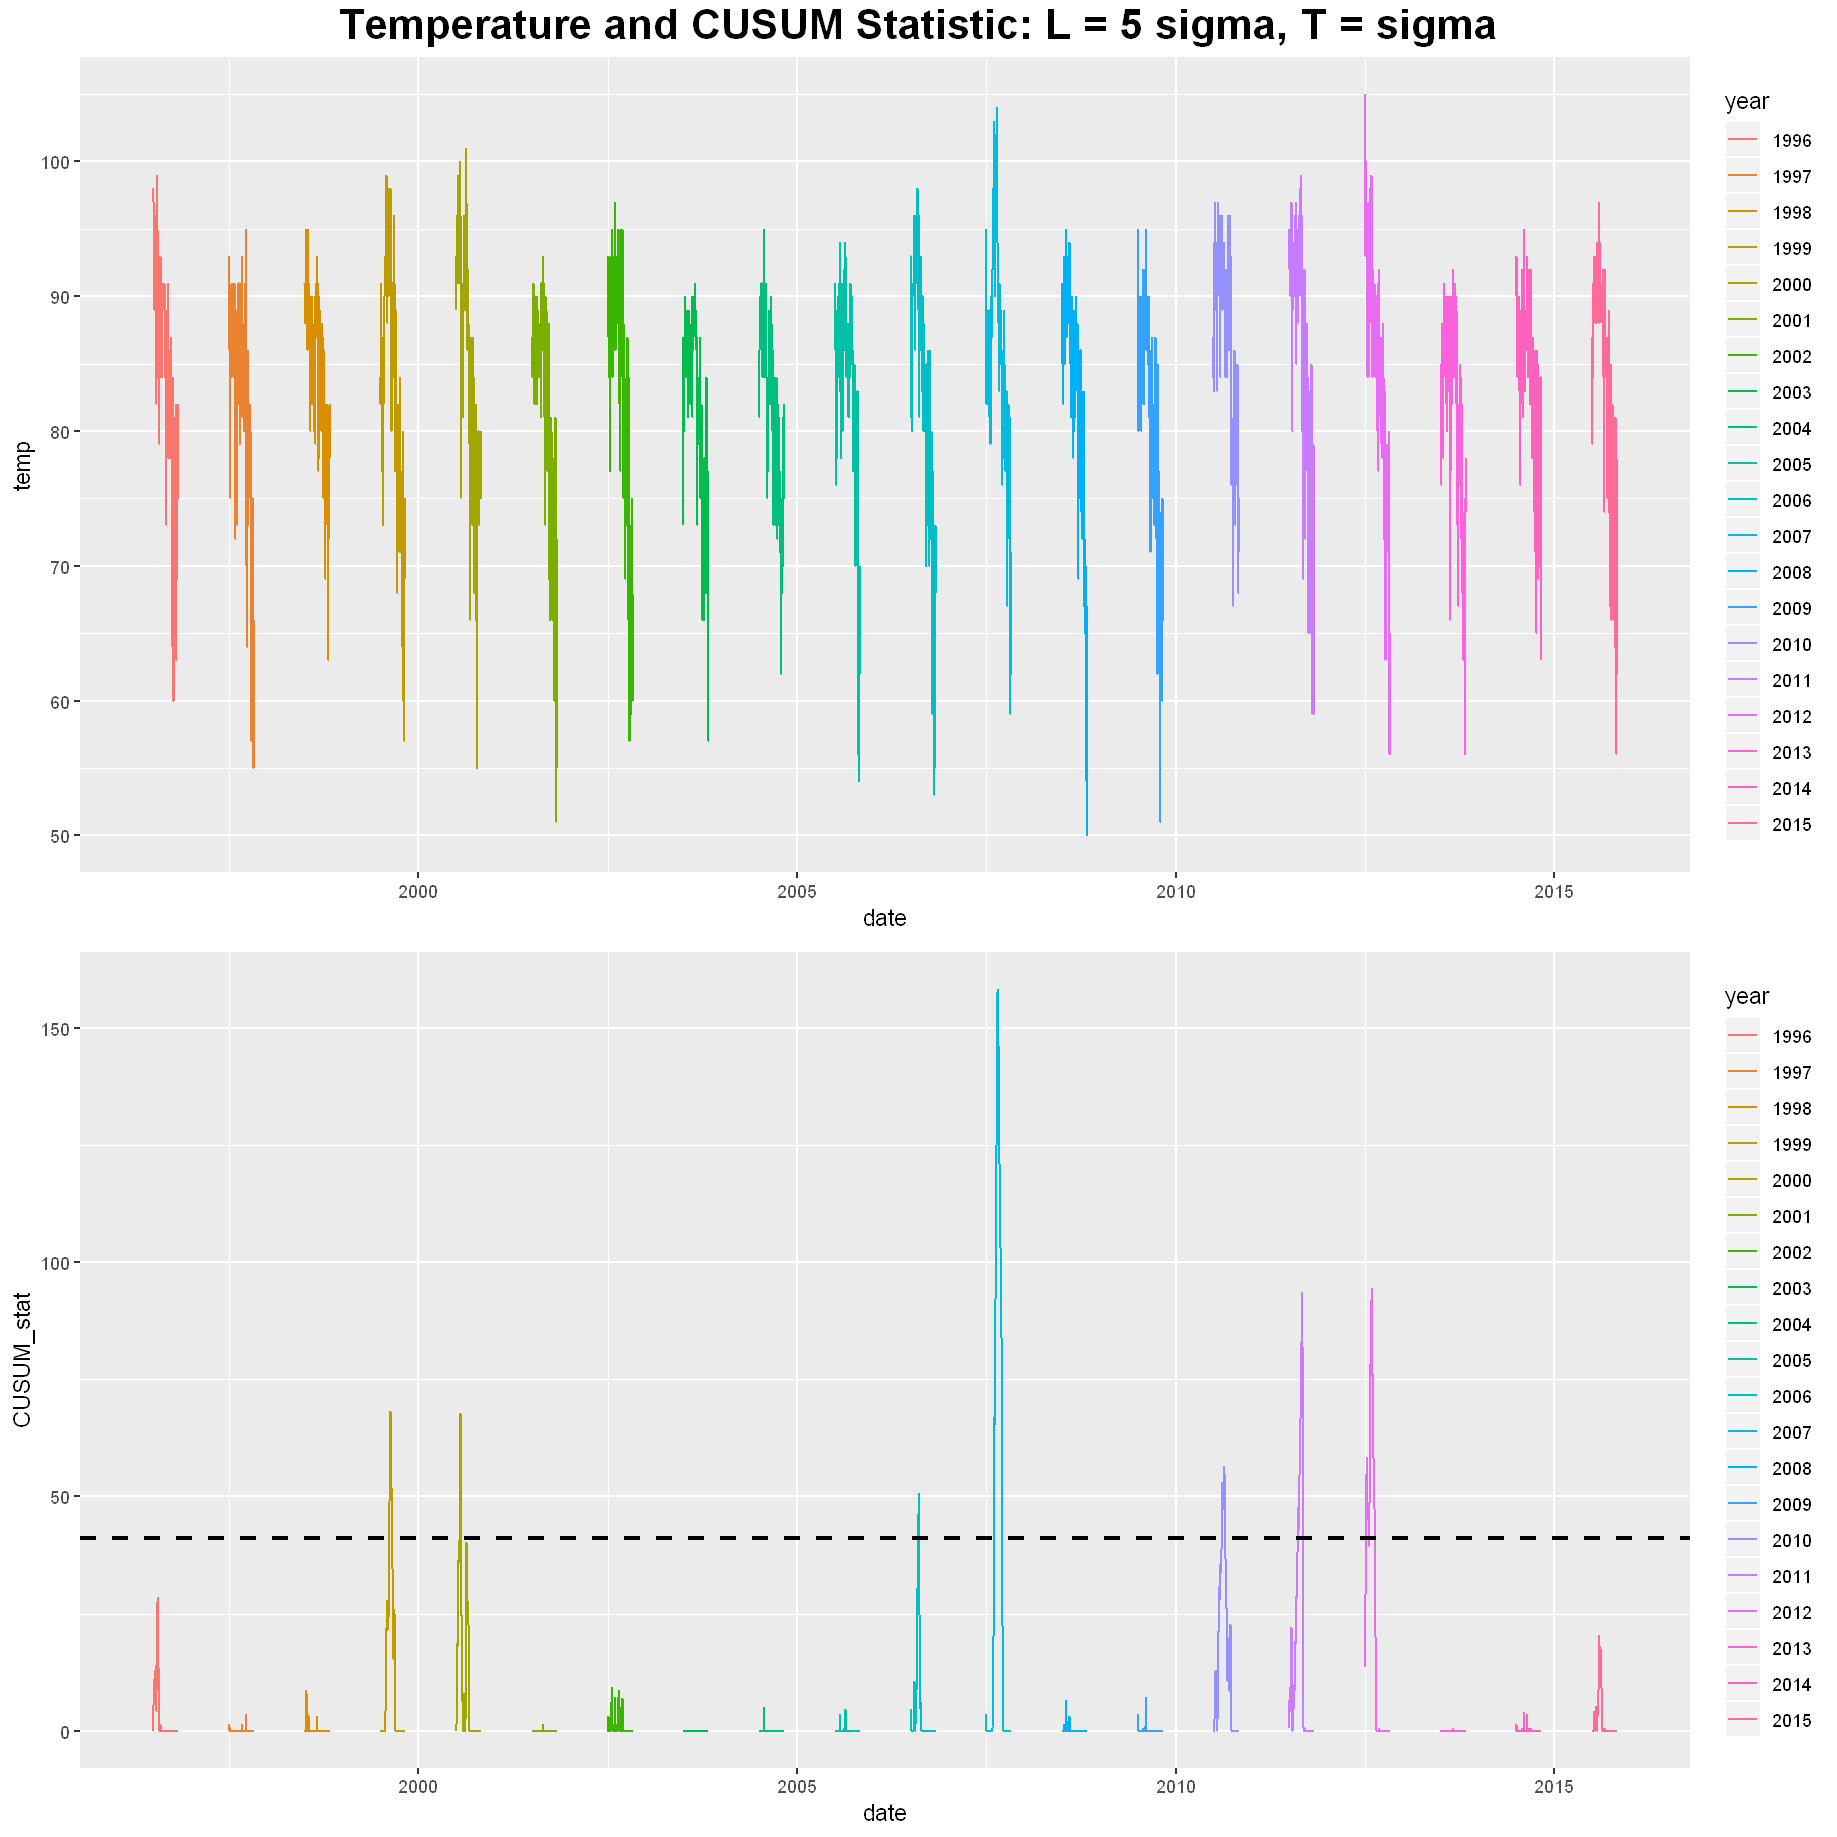

In [716]:
norm_years = c(1996:1998)
mu <- ATL_temp_ts[ATL_temp_ts[, year] %in% norm_years, temp] %>% mean
sigma <- ATL_temp_ts[ATL_temp_ts[, year] %in% norm_years, temp] %>% sd

T <- sigma
L <- 5 * sigma

S <- numeric(ATL_temp_ts[, .N])
S[1] <- 0
for (i in 2:ATL_temp_ts[, .N]) {
    s = S[i-1] + ATL_temp_ts[i, temp] - T - mu
    S[i] = s * (s > 0)
}

ATL_temp_ts[, CUSUM_stat:=S]

plt1 <- ggplot() + geom_line(data=ATL_temp_ts, aes(x=date, y=temp, color=year))
plt2 <- ggplot(data=ATL_temp_ts, aes(x=date, y=CUSUM_stat, color=year)) + geom_line() + geom_hline(yintercept = L, color="black", size=1, linetype="dashed")

fig <- ggarrange(plt1, plt2, nrow=2, ncol=1)
annotate_figure(fig,
    top = text_grob("Temperature and CUSUM Statistic: L = 5 sigma, T = sigma", size = 20, face="bold"),
)

## Within-Year Variation

It does seem that there was a shift in temperature more than 2.7 degree in Atlanta in a quite a number of years. We can continue to finetune $T$ and $L$ according to trial and error if we want. However, there is also a way we can leverage the breadth of the data (date, year level) and device an alternative approach to control for the within-year variations. The graph below shows all the summer temperatures for the 21 years, and it is evident that there was overall a decreasing trend. It is acknowledged that aggregation could result in loss in sensitity, as individual effects got aggregated out, but one advantage of aggregation is that we can have an apples-to-apples comparison - by controlling for the time of year being considered, this also enables us to study the changes in summer trends (as will be discussed in the next section). 

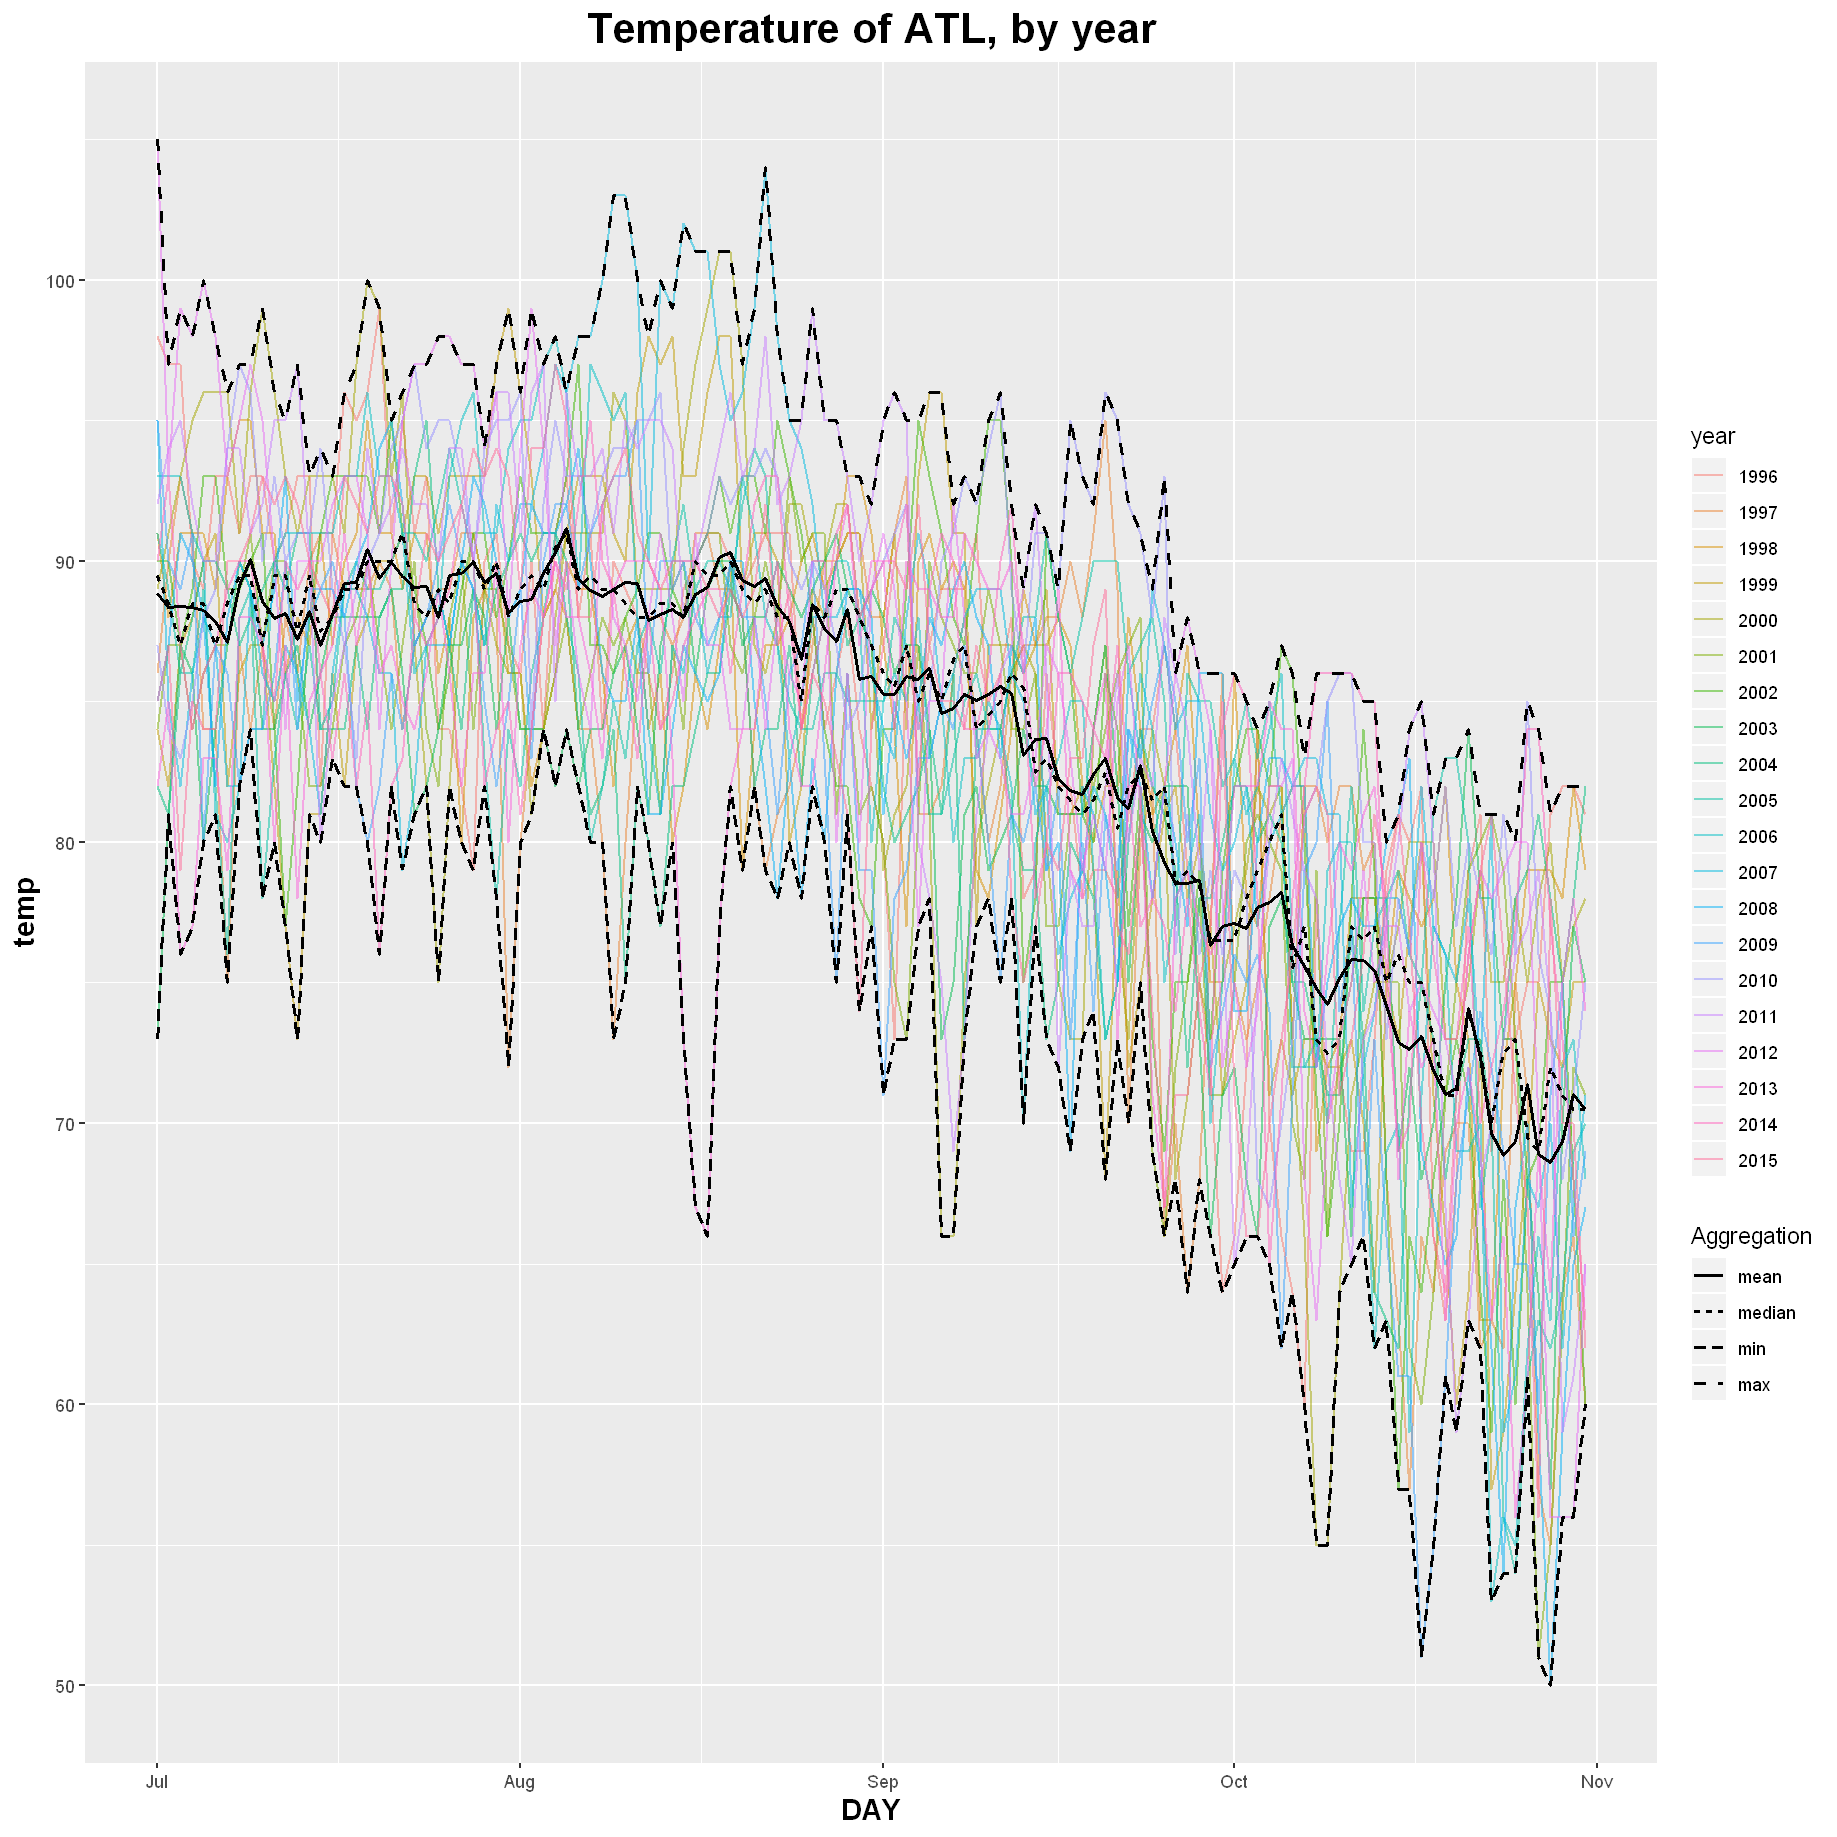

In [664]:
ATL_temp_ts[, DAY:=as.Date(DAY, format('%d-%b'))]
agg <- ATL_temp_ts[, .(mean=mean(temp), median=median(temp), min=min(temp), max=max(temp)), by=.(DAY)] %>% melt(., value.name="temp", variable.name="Aggregation", id.vars="DAY")

figsize <- 150
options(repr.plot.width = sqrt(figsize), repr.plot.height = sqrt(figsize), repr.plot.res = figsize)
ggplot() + geom_line(data=ATL_temp_ts, aes(x=DAY, y=temp, color=year, group=year), alpha=0.5) + geom_line(data=agg, aes(x=DAY, y=temp, linetype=Aggregation, group=Aggregation), size=.7) + ggtitle("Temperature of ATL, by year") +
theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20), 
      axis.title.x=element_text(face = "bold", size = 14),
      axis.title.y=element_text(face = "bold", size = 14))

## CUSUM chart with Rational Subgroups

One way to control for this variation is to group days to form rational subgroups across years. For example, we may group form rational subgroups by grouping days in the same month together. We will therefore have groups July, August, September, and October across 21 years. Rational subgroups will arise from combinations of (year, month). Then we form a CUSUM chart for each month where temperatures are averaged yearly - so each of the 4 CUSUM chart will have length 21. We will replace $\mu$ and $\sigma$ with the subgroup counterparts, $\bar{\mu}$ and $\frac{\sigma}{\sqrt{n}}$. We will experiment with subgroup sizes 1 day, 3 days, 7 days, 15 days, and monthly.

Another advantage is that it allows us to catch specific patterns in climate change. For example, "getting warming" could mean having a higher temperature across days (parallel shift), or simply having longer summers. In each of the subgroup partition, we will present a binary heat map for the CUSUM chart of each subgroup. Another advantage is now that we focus on data series with less variance, we can rely less of heuristic finetuning and more on the proposed $T$ that is justified by theoretical evidence.

The (year, date) grid will be red if the CUSUM statistic with tolerance $\frac{2.7\sqrt{n}}{2\sigma}$ (or $T = 2.7$) for that particular year exceeded the $\frac{5\sigma}{\sqrt{n}}$ threshold, and is white otherwise. If temperature did get warmer over time, we should see a point along the year (x) axis in which large patches of reds start to appear. If temperature did get warmer over time, but only for a certain part (e.g. end of summer - as the season has prolonged) we should be able to observe reds on the right top (end of season), middle, of bottom (beginning of season) portions.

#### 3-day Subgroups

We already see that the within-group sd are smaller than the pooled sd. It's likely we can continue to use our old threshold $T = 2.7 / 2$. 

In [648]:
grp_size <- 3
ATL_temp[, date_grp:=seq(from=0, to=ATL_temp[, .N]-1)  %/%  grp_size]
ATL_temp_grp <- ATL_temp[, lapply(.SD, mean), by=.(date_grp), .SDcols=year_col]
ATL_temp_grp %<>% melt(., value.name="temp", variable.name = "year", id.vars="date_grp")
ATL_temp_grp[, year:= as.numeric(levels(year))[year]]

print(ATL_temp_grp[, .(size=.N, mean=mean(temp), sd=sd(temp), min=min(temp), max=max(temp)), by=.(date_grp)])

    date_grp size     mean       sd      min      max
 1:        0   20 84.83333 3.641059 76.33333 91.33333
 2:        1   20 87.68333 3.401883 82.00000 94.00000
 3:        2   20 83.20000 3.446161 78.33333 91.66667
 4:        3   20 83.11667 3.013178 76.66667 91.66667
 5:        4   20 83.95000 2.332769 80.66667 88.33333
 6:        5   20 86.86667 2.680665 83.00000 93.00000
 7:        6   20 82.28333 3.377384 73.00000 86.00000
 8:        7   20 82.01667 2.404856 77.66667 86.33333
 9:        8   20 82.63333 3.524185 75.66667 88.00000
10:        9   20 86.86667 3.319973 79.33333 91.33333
11:       10   20 81.31667 3.218141 76.00000 85.33333
12:       11   20 81.38333 3.911708 70.66667 87.33333
13:       12   20 83.76667 3.744938 75.00000 92.66667
14:       13   20 87.46667 2.424051 83.33333 91.66667
15:       14   20 80.70000 3.094799 72.66667 86.33333
16:       15   20 83.51667 2.706879 78.33333 89.33333
17:       16   20 83.31667 3.030980 79.33333 89.66667
18:       17   20 87.35000 3

### Heatmap Results and Conclusion

We did the rational subgroup CUSUM chart with subgroup sizes $n$ equals 1, 3, 7, 14, and 30 days. We found consistent patterns across these values of $n$:

- Red portions started appearing after 2007. Suggesting that the climate change started around that time.
- In general, the end of season experienced slightly more increased than other parts, as we see more red portions on the right top corner. A hypothesis that might be consistent with this is that summers tend to end (a little) later. Which according to my own experience sounds plausible. 
- Noticing that the there are also some reds in the right bottom. We might test a more aggressive version of the hypothesis above, that summers are getting prolonged.

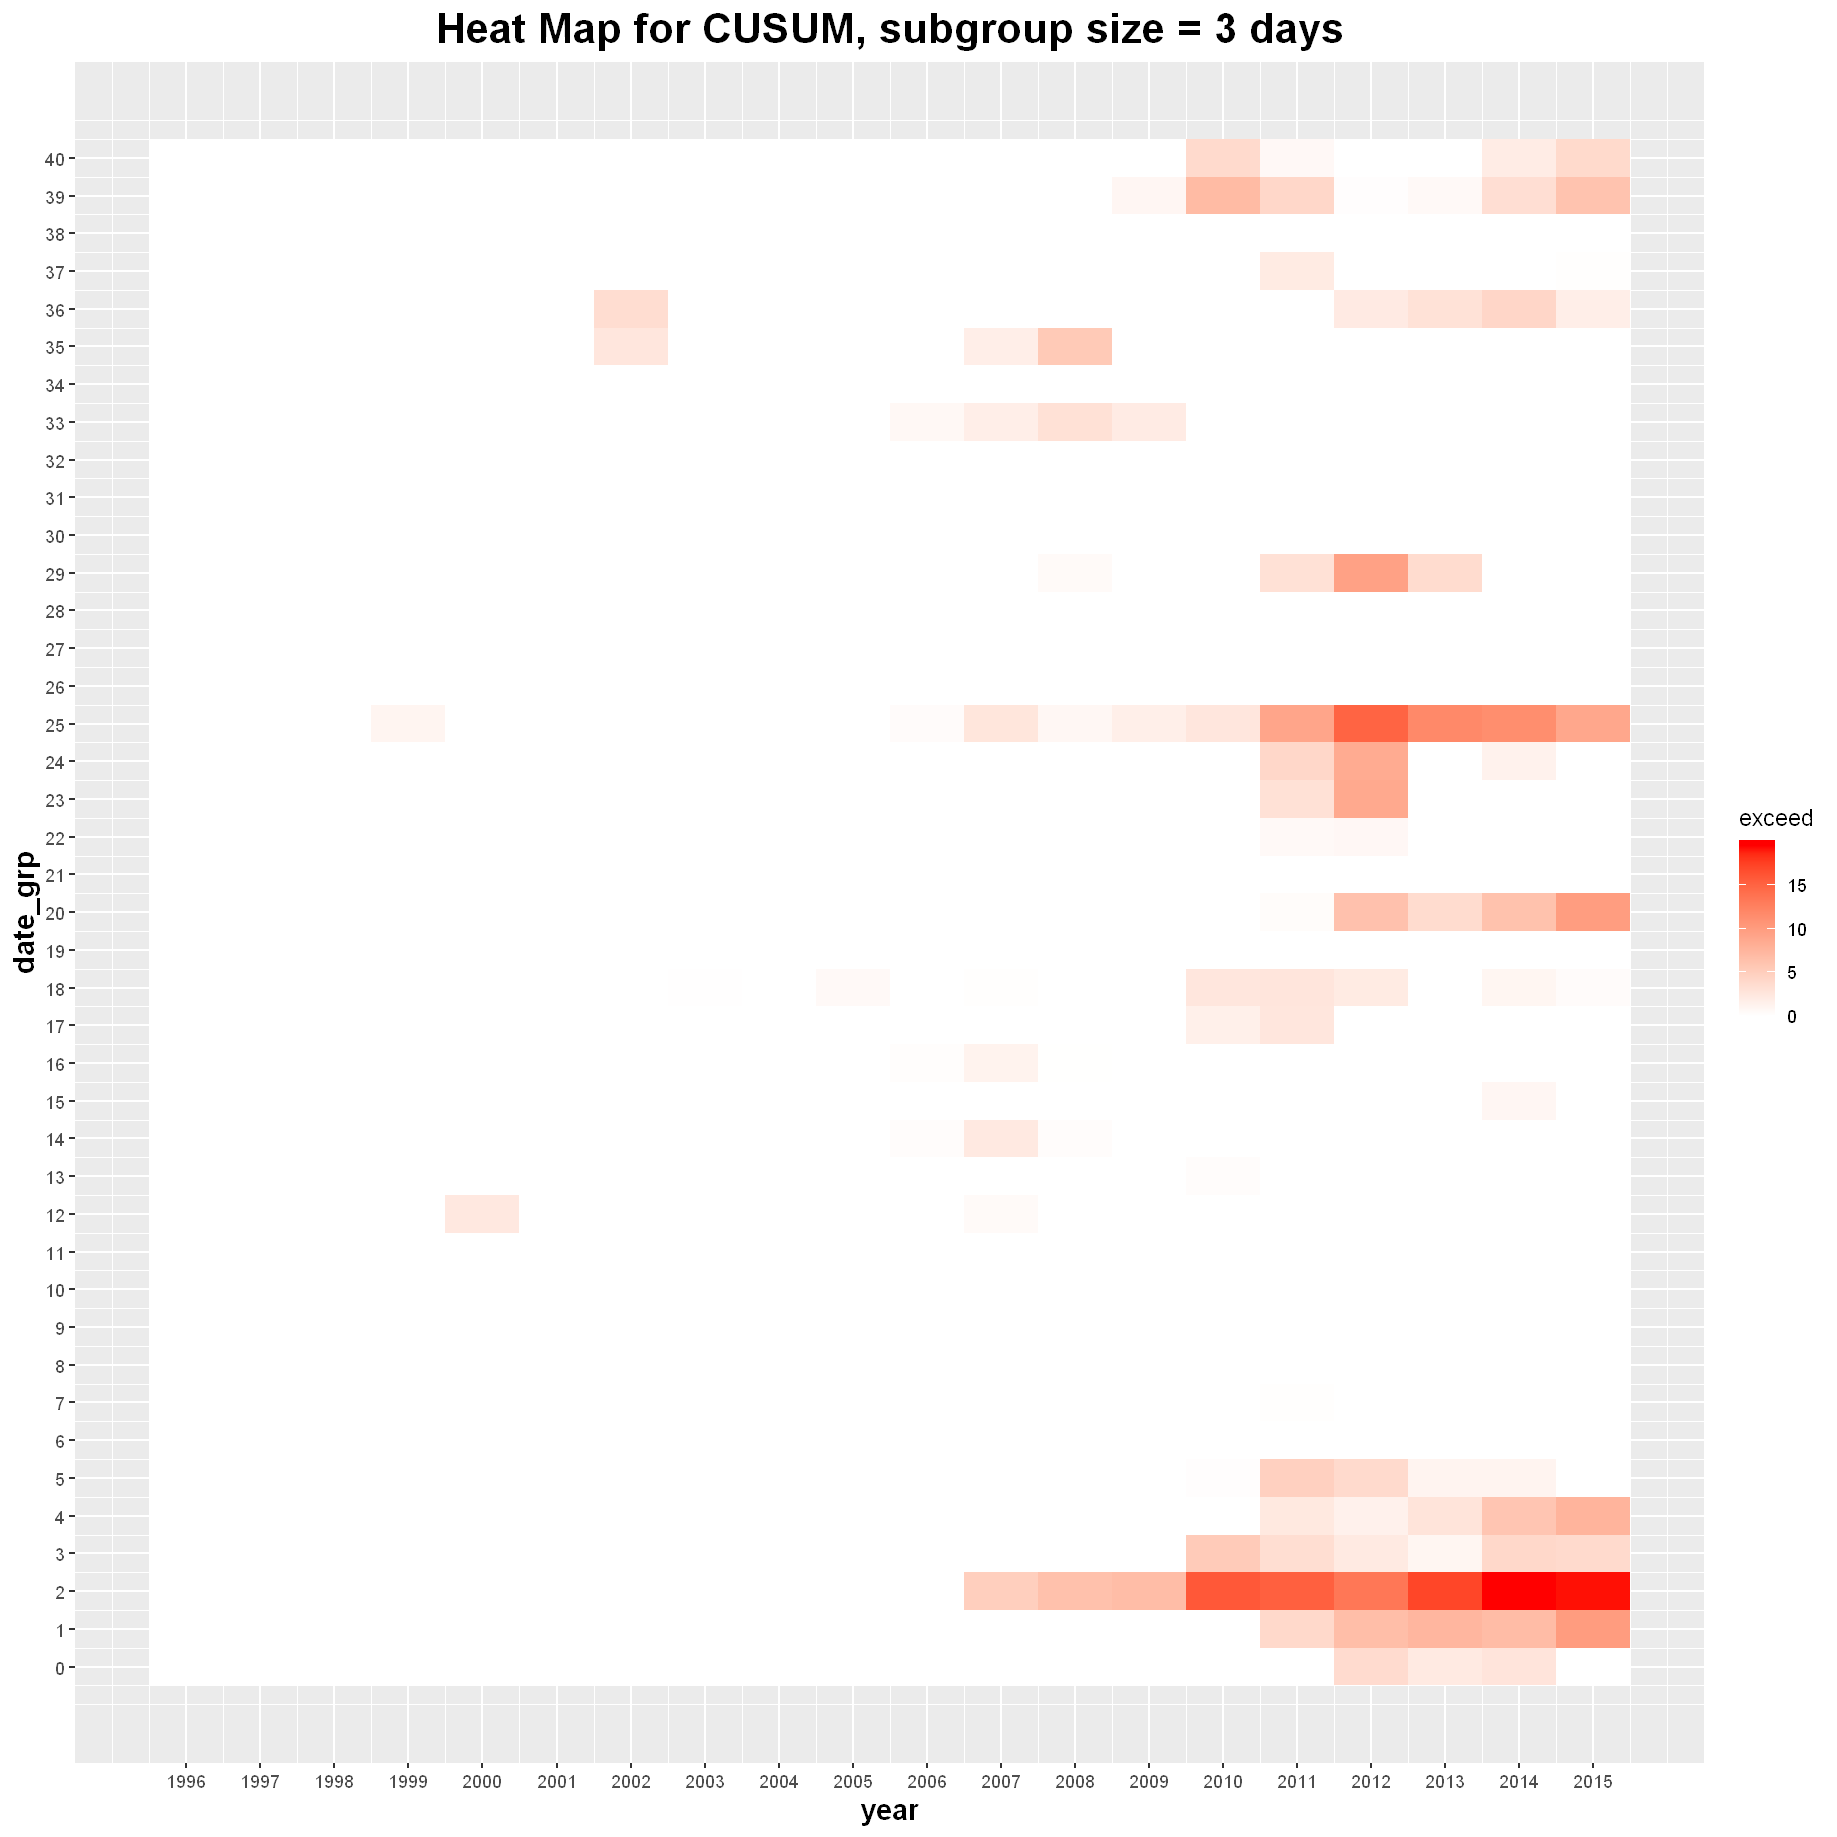

In [717]:
make_CUSUM_chart <- function(subgrp, grp_size, T=2.7/2, H=5) {
    subgrp <- subgrp[order(date_grp, year)]
    S <- numeric(subgrp[, .N])
    S[1] <- 0
    for (i in 2:subgrp[, .N]) {
        s = S[i-1] + subgrp[i, temp] - T - subgrp[year %in% c(1996:1998), mean(temp)]
        S[i] = s * (s > 0)
    }
    subgrp[, CUSUM_stat := S]
    L <- 5 * subgrp[year %in% c(1996:1998), sd(temp)] / sqrt(grp_size)
    subgrp[, L := L]
    subgrp[]
}

make_heatmap <- function(grp_size) {

    ATL_temp[, date_grp:=seq(from=0, to=ATL_temp[, .N]-1)  %/%  grp_size]
    ATL_temp_grp <- ATL_temp[, lapply(.SD, mean), by=.(date_grp), .SDcols=year_col]
    ATL_temp_grp %<>% melt(., value.name="temp", variable.name = "year", id.vars="date_grp")
    ATL_temp_grp[, year:= as.numeric(levels(year))[year]]

    ATL_temp_grp_ <- make_CUSUM_chart(ATL_temp_grp[date_grp==0], grp_size)
    for (i in 1:ATL_temp_grp[, max(date_grp)]) {
        ATL_temp_grp_ %<>% rbind(., make_CUSUM_chart(ATL_temp_grp[date_grp==i], grp_size))
    }

    ATL_temp_grp_[, exceed:=(CUSUM_stat - L) * (CUSUM_stat > L)]
    plt <- ggplot(data=ATL_temp_grp_, aes(x=year, y=date_grp, fill=exceed)) + geom_tile() + scale_fill_gradient(low="white", high="red") + 
            ggtitle(paste("Heat Map for CUSUM, subgroup size =", grp_size, "days")) + scale_y_continuous(breaks=ATL_temp_grp_[, unique(date_grp)]) +
            scale_x_continuous(breaks=ATL_temp_grp_[, unique(year)]) + 
            theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 20), 
                  axis.title.x=element_text(face = "bold", size = 14),
                  axis.title.y=element_text(face = "bold", size = 14))
    
}

plt3 <- make_heatmap(3)
plt3

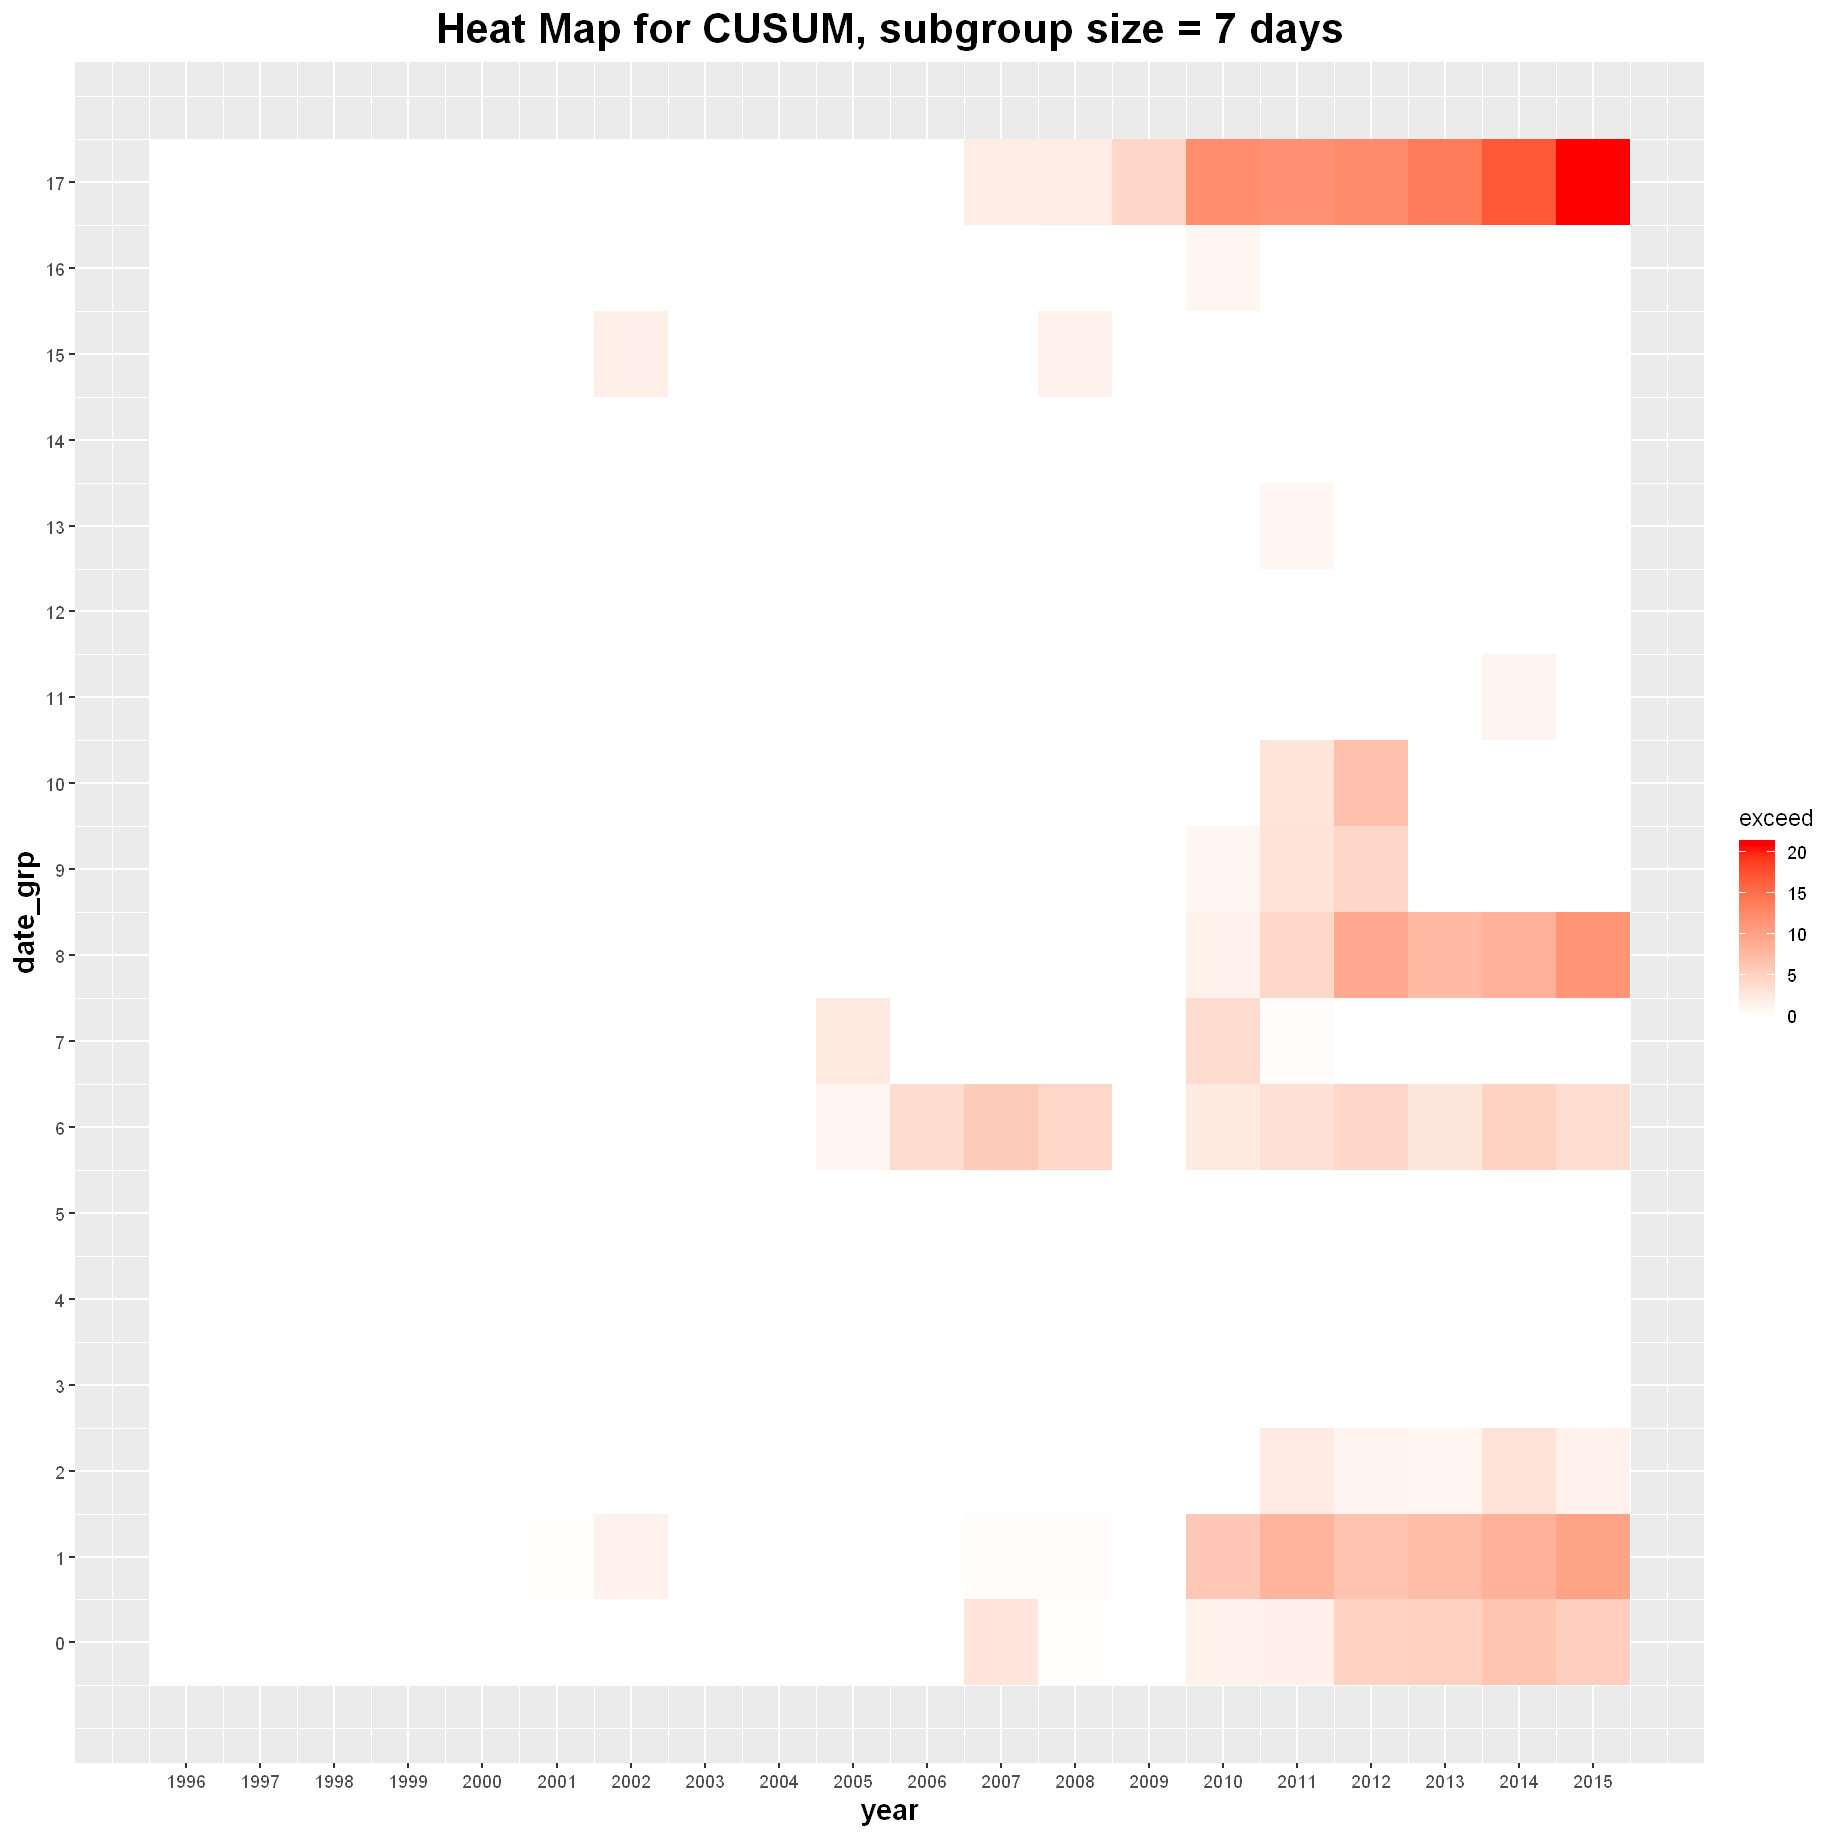

In [698]:
plt7 <- make_heatmap(7)
plt7

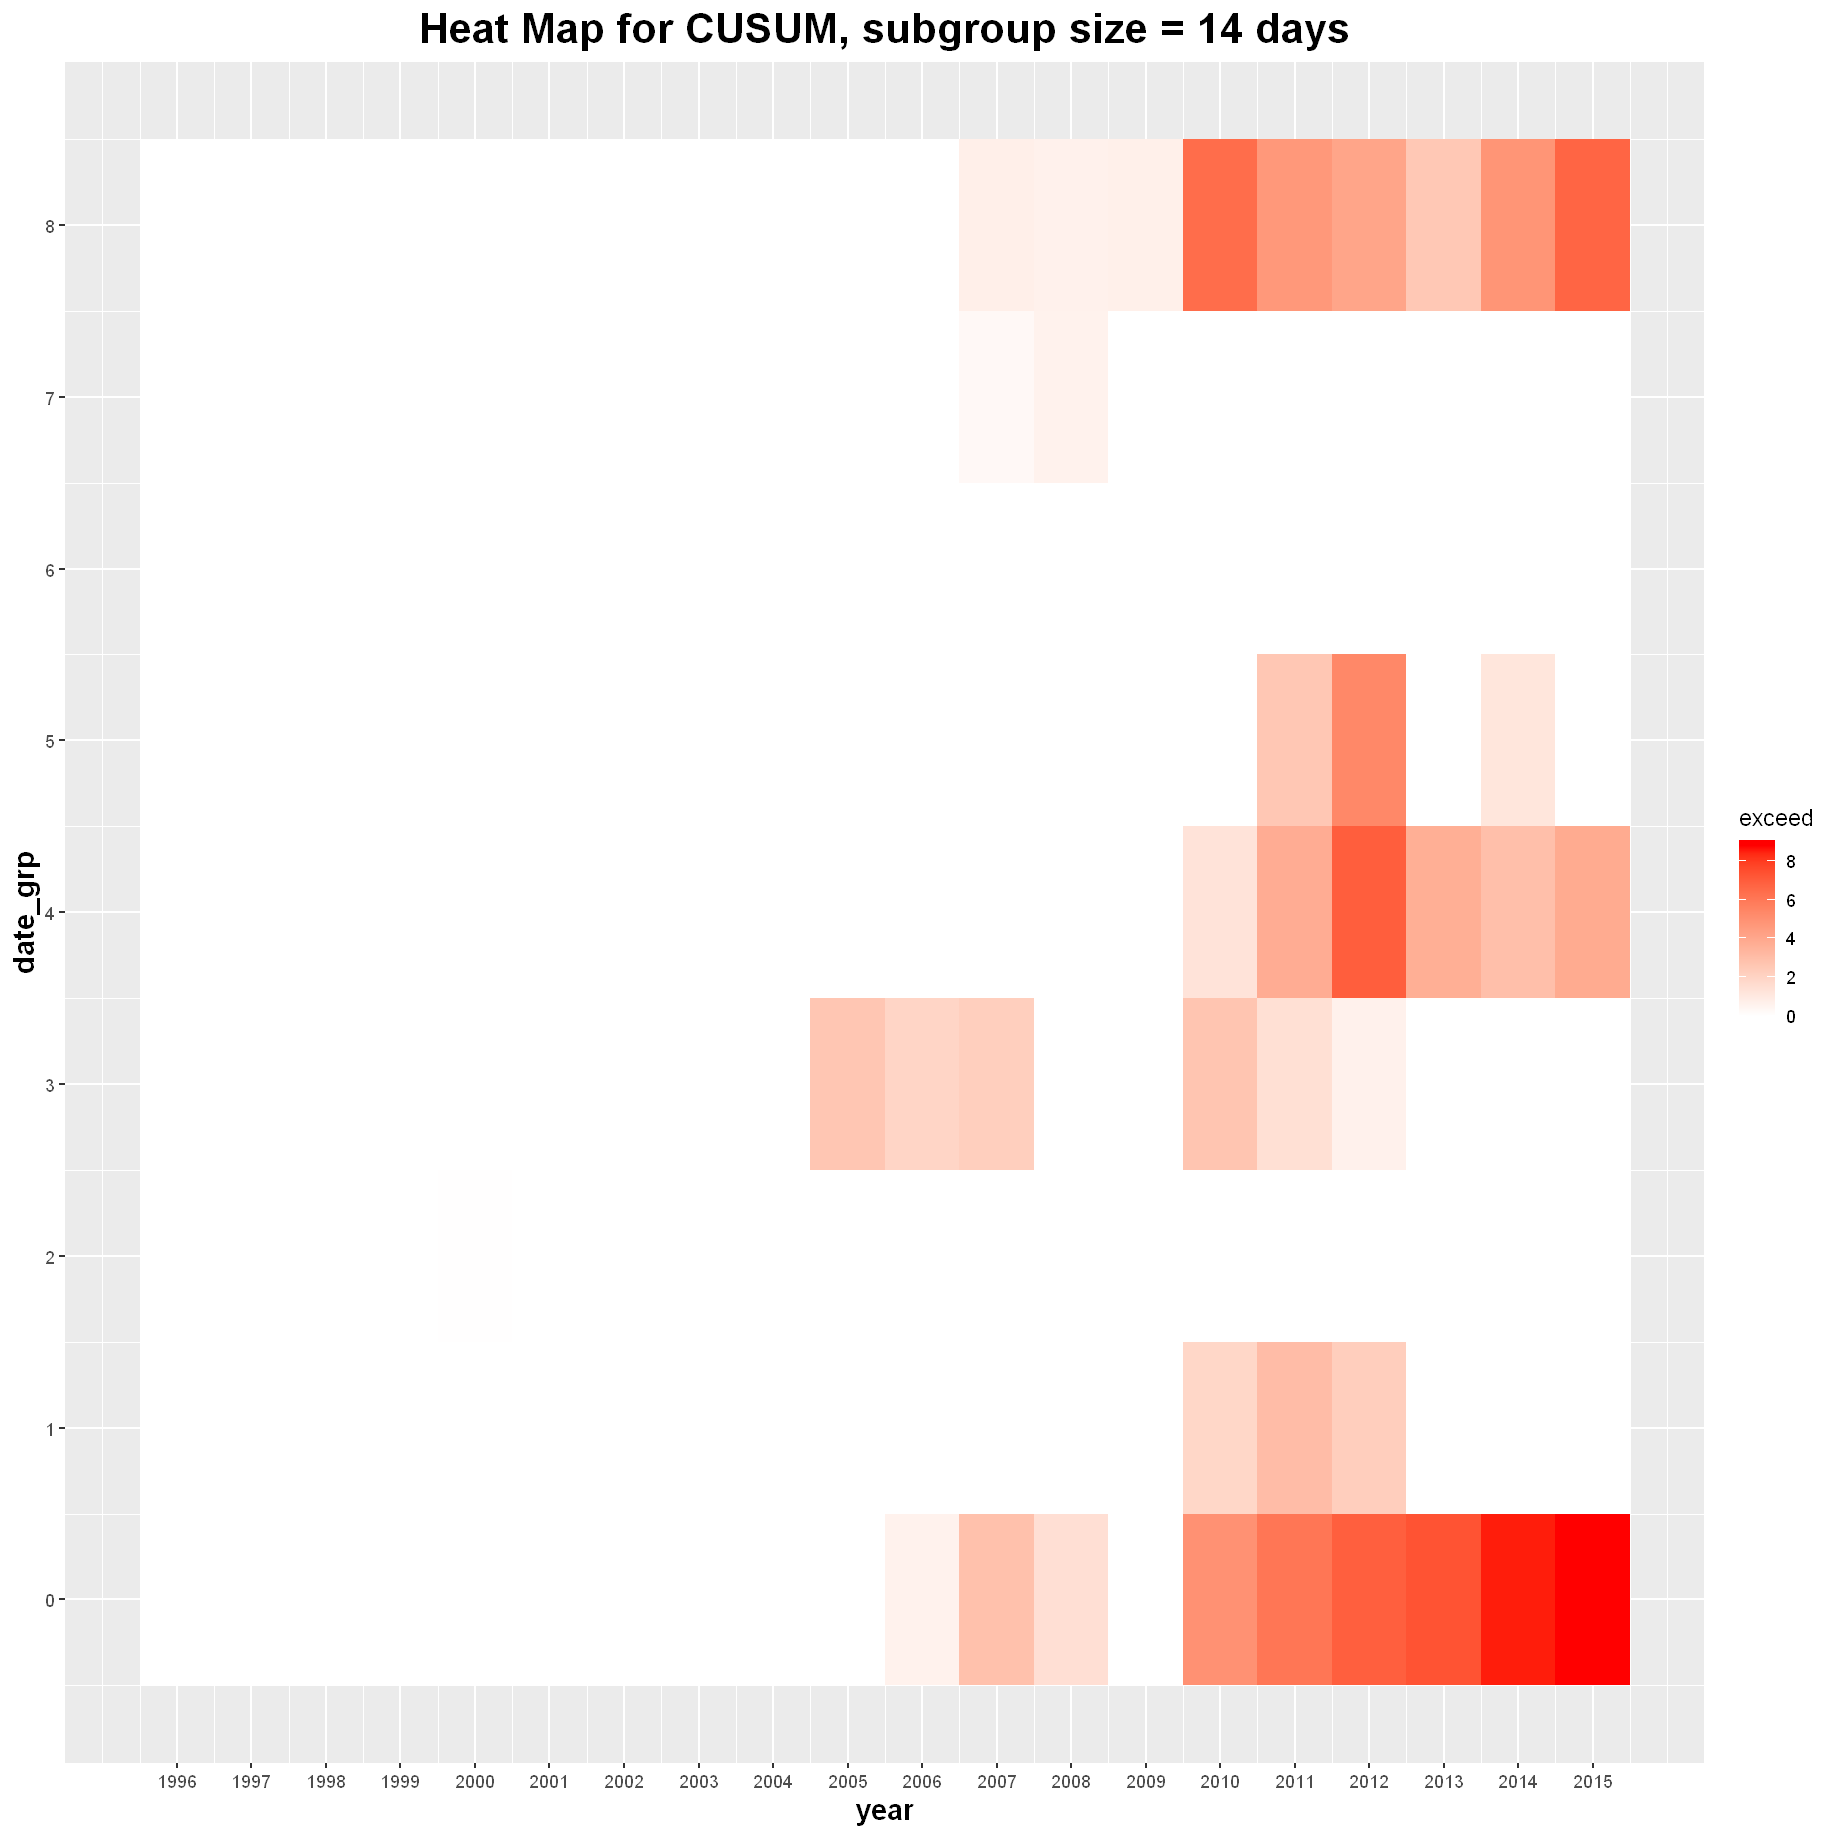

In [699]:
plt14 <- make_heatmap(14)
plt14

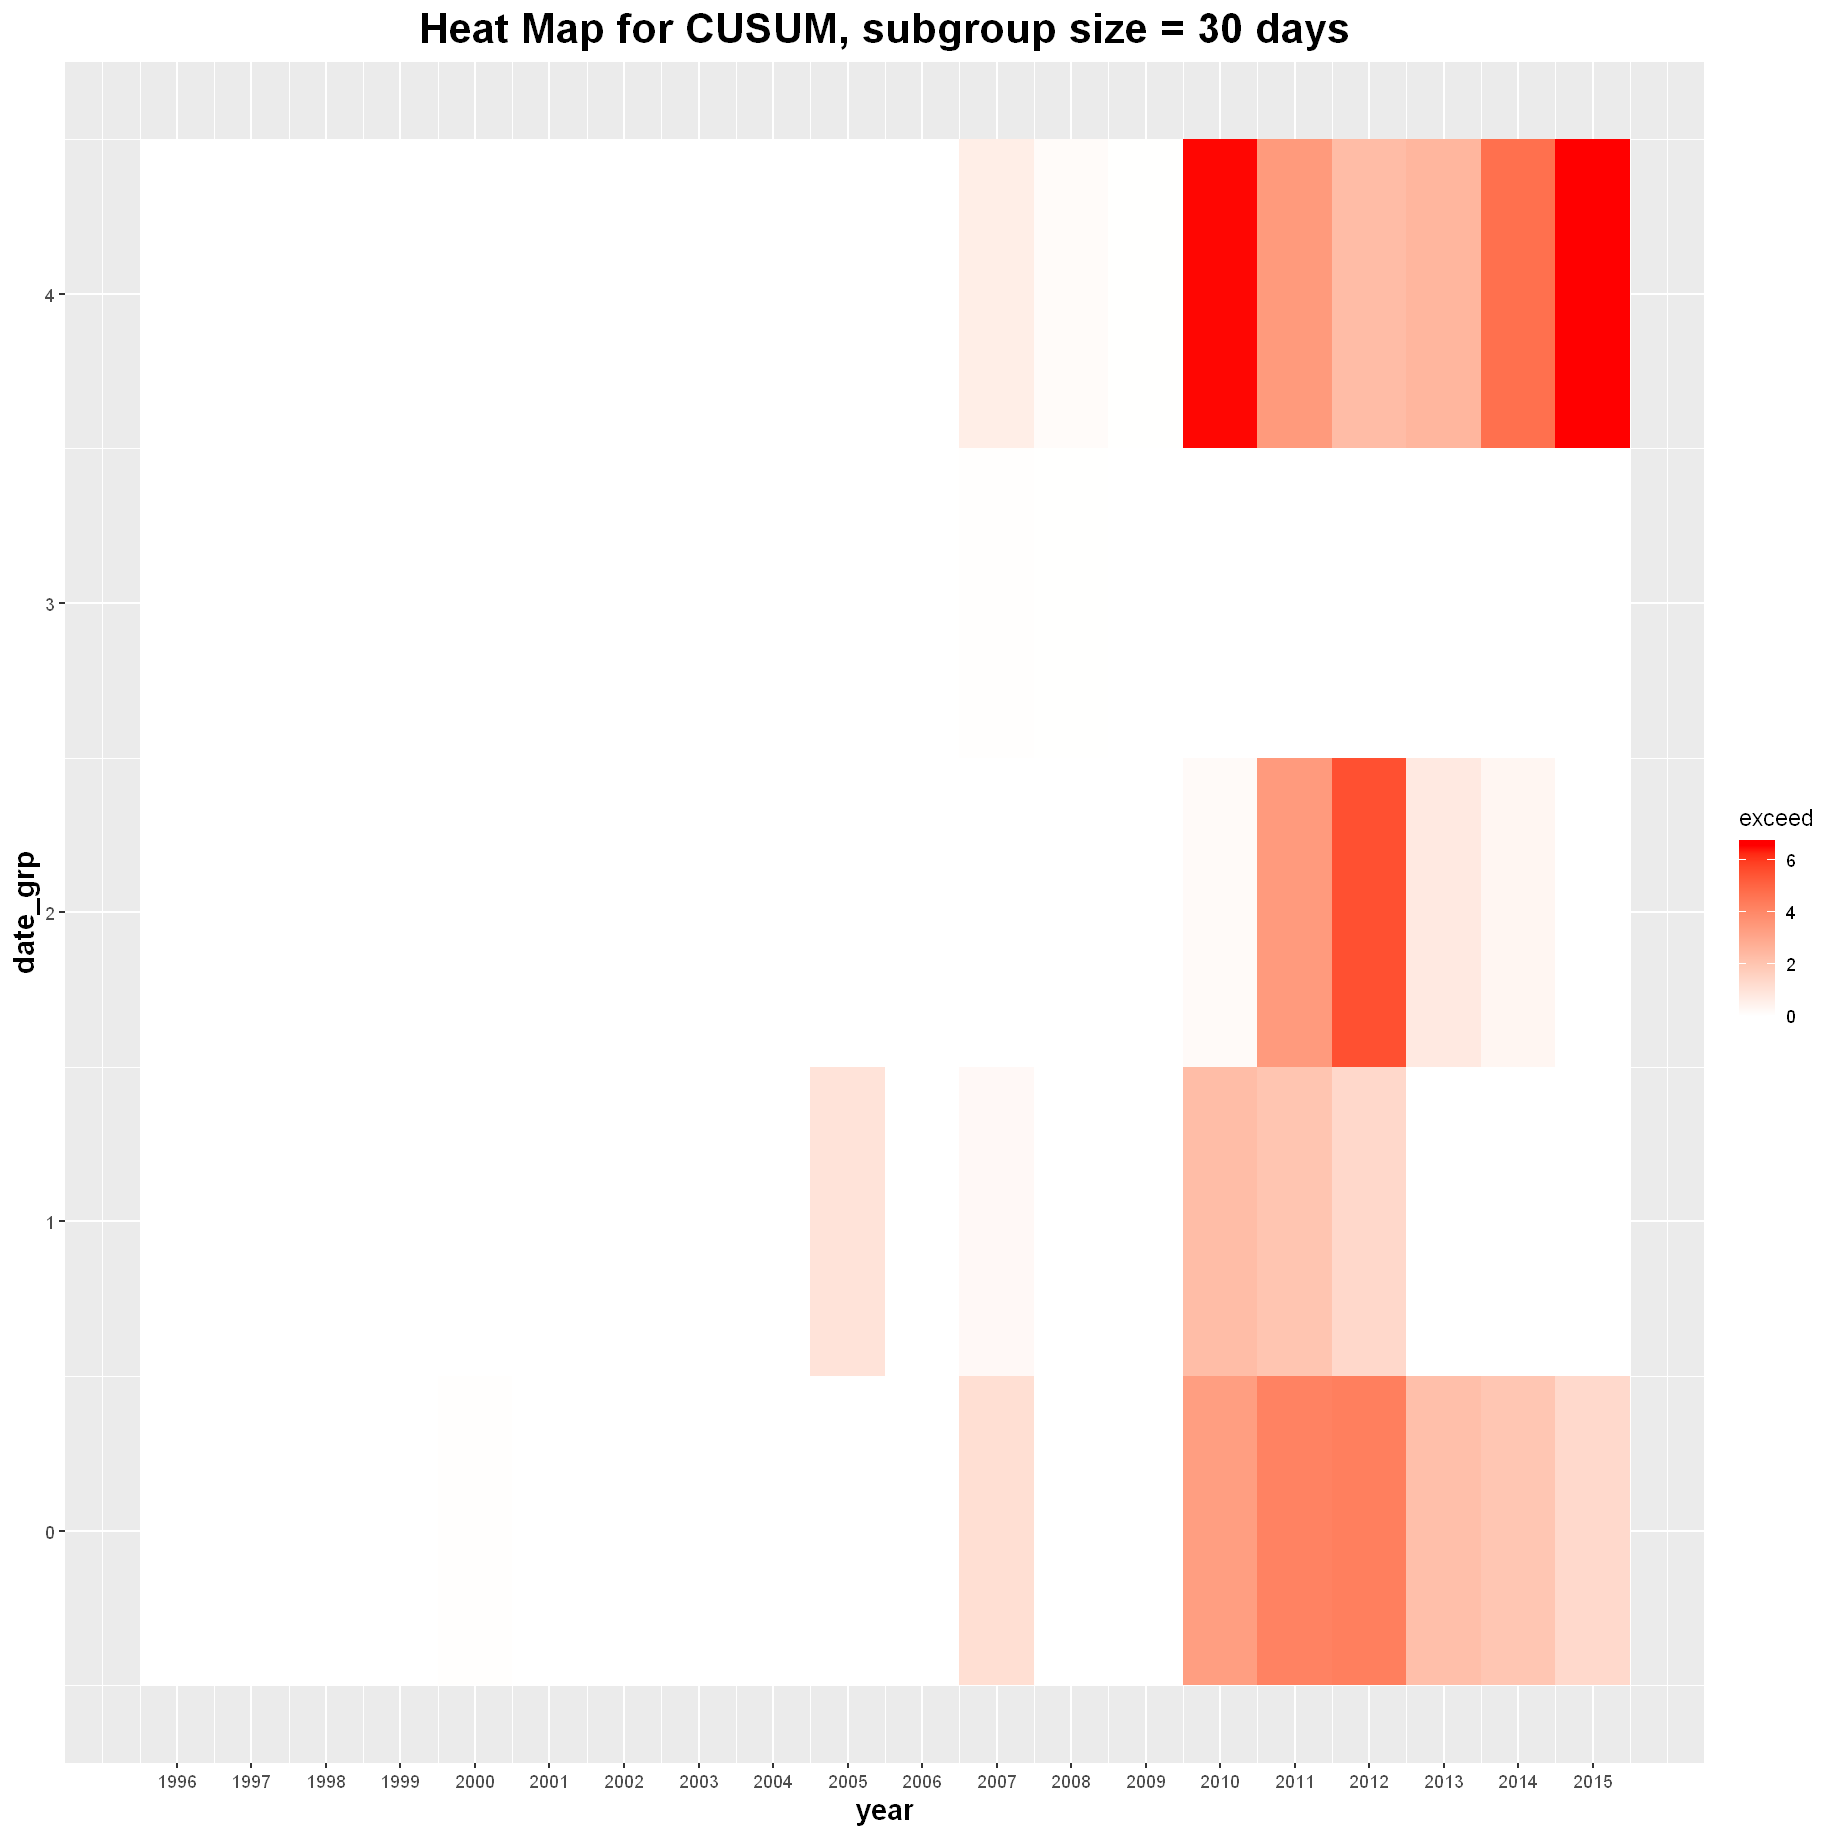

In [700]:
plt30 <- make_heatmap(30)
plt30

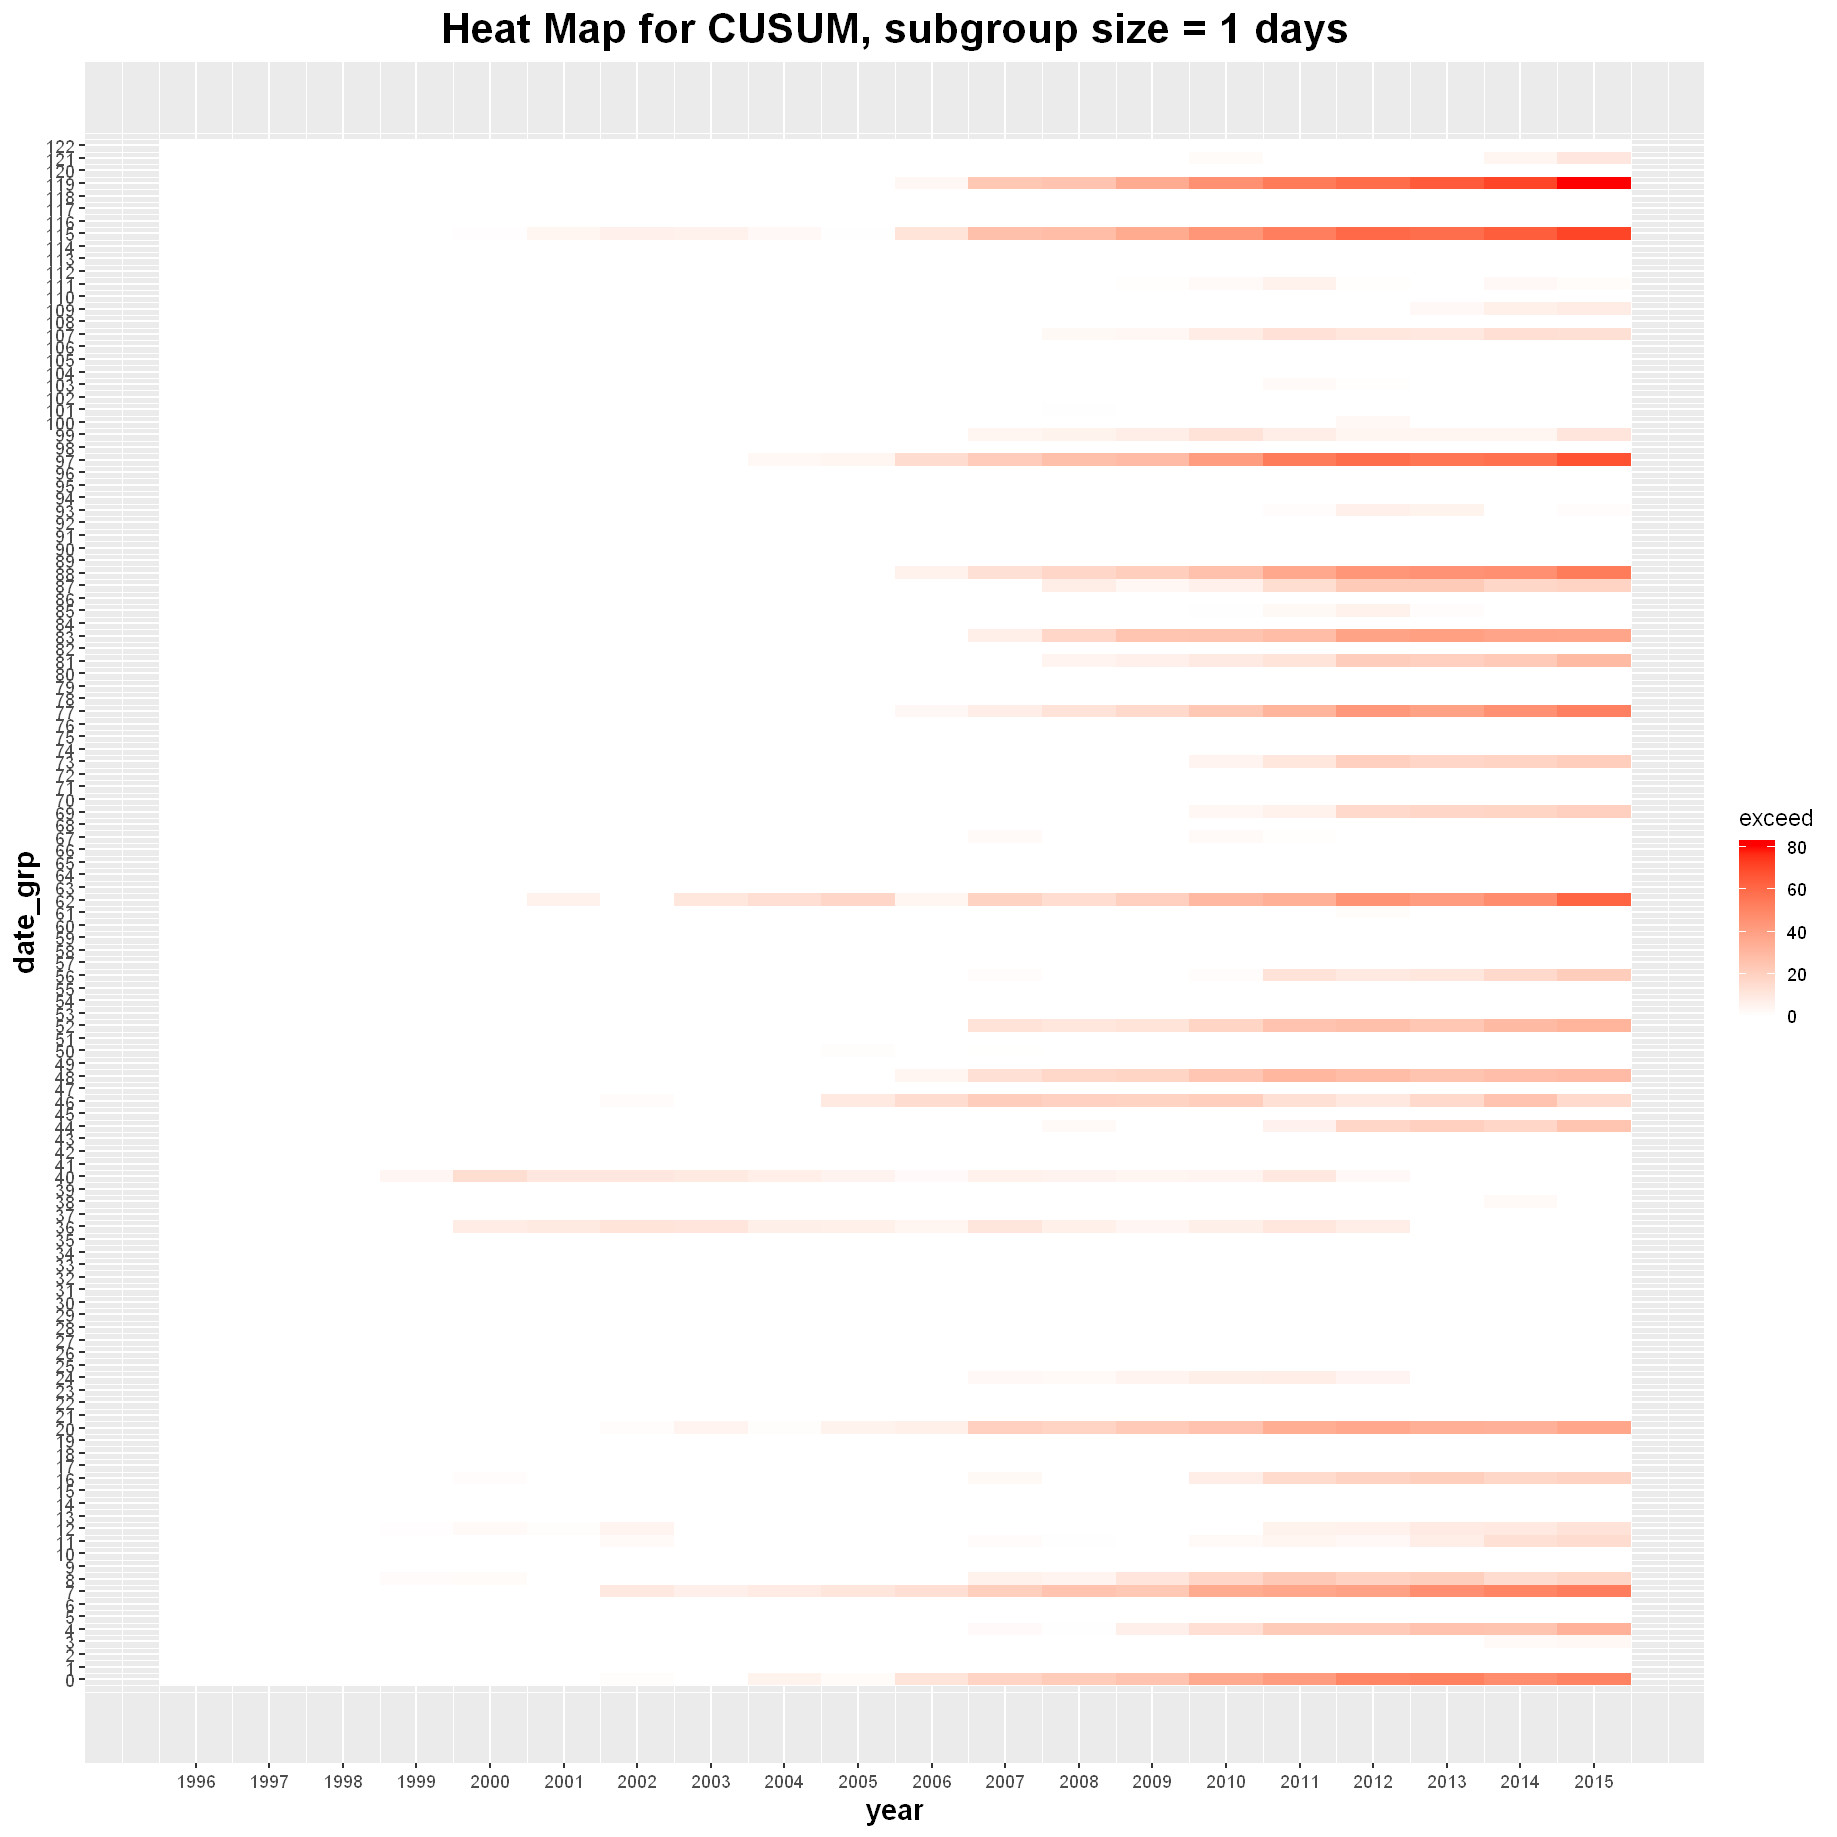

In [701]:
plt1 <- make_heatmap(1)
plt1

## Extension: Finetuning by Simulation

A extension to this exercise is that we can find a parameteric distribution that resembles that distribution of the temperature. By simulating data from it and applying a desired level of increase in mean, experiments can be conducted to find  optimized $L$, $T$ pairs that balance rate of detection and risk of type I error.